# **Study Case : HELP Intenational** <br/> 

<font size="5"> <b> Problem Descriptions </b></font>
 <br />  <br />
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, tugas pada projek kali ini adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian, tentukan negara mana saja yang paling perlu menjadi fokus CEO.

<font size="5"> <b> Data Dictionary </b></font>
 <br />
- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.


<font size="5"> <b> Steps </b></font>

1. Reading and Understanding Data
 - Import libraries
 - Read and inspect data
2. Exploratory Data Analysis
 - Data cleansing
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariate Analysis
3. Outliers Treatment
4. Scaling Data
5. Creating KMeans Clustering and Visualizing Clusters Formed
6. Report Countries

# **1. Reading and Understanding Data** <br/> 

#### 1.1 Import libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For rescaling the data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To check most accurate KMeans clustering
from sklearn.metrics import silhouette_score

#### 1.2 Read and inspect data

**Read the data**

In [3]:
# Check the top 5 rows of dataframe
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the bottom 5 rows of dataframe
df.tail()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


---

**Check data information**

In [5]:
# Check dataframe shape
df.shape

(167, 10)

In [6]:
# Check number of non-null data from each column and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Check number of unique data in each columns 
df.nunique()

Negara              167
Kematian_anak       139
Ekspor              147
Kesehatan           147
Impor               151
Pendapatan          156
Inflasi             156
Harapan_hidup       127
Jumlah_fertiliti    138
GDPperkapita        157
dtype: int64

Dari rangkaian di atas, kita tahu bahwa setiap data dari kolom 'negara' adalah unik. Dengan demikian, dataframe tersebut tidak memiliki data duplikat.

**Check data statistic**

In [8]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Kita dapat memvisualisasikan statistik ini untuk menemukan wawasan yang berguna.

---
---

# **2. Exploratory Data Analysis** <br/> 

#### 2.2 Data cleansing

**Check and handle null values**

In [9]:
# Check any null values from given dataset
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

---
---

#### 2.3 Univariate Analysis

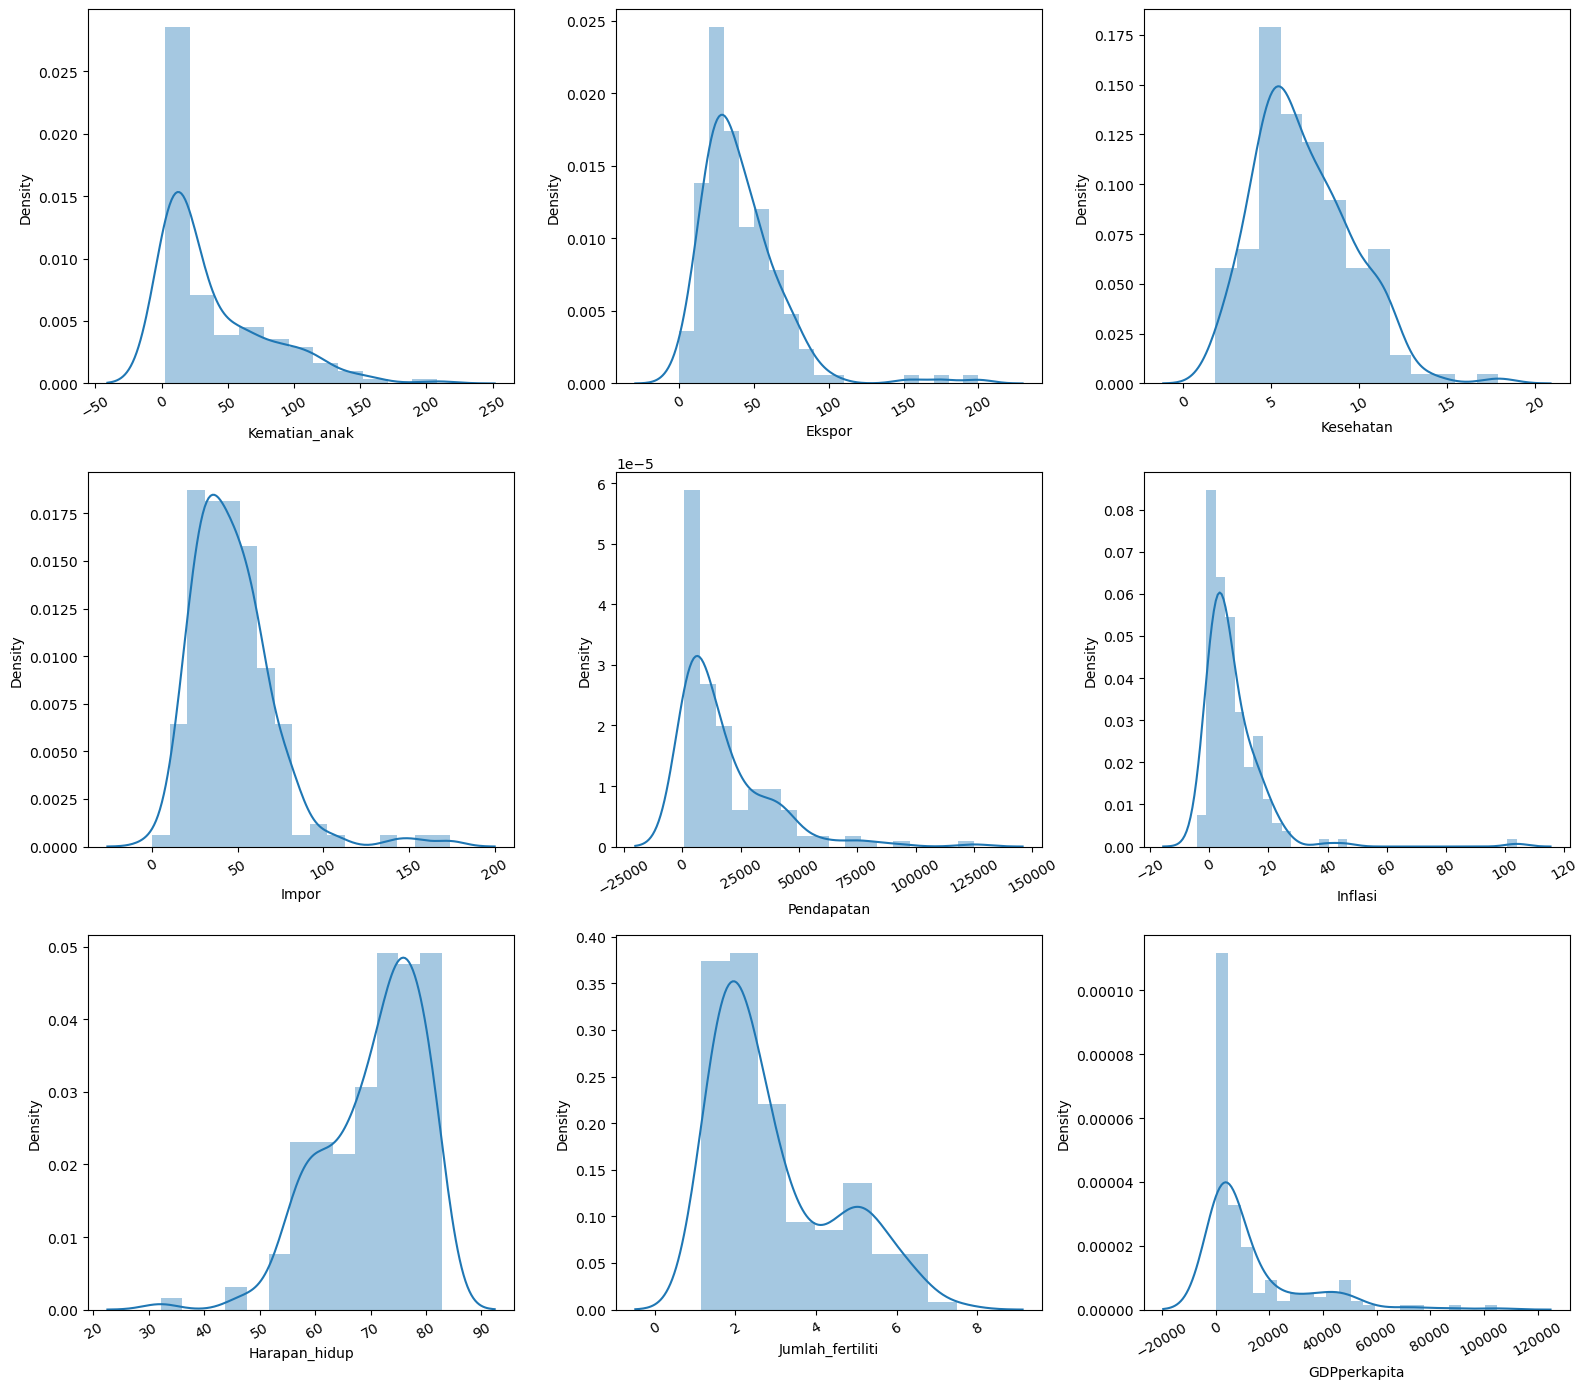

In [10]:
# Visualize numerical columns with distribution plots
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


* Kita melihat bahwa setiap plot distribusi yang mewakili sebuah fitur cenderung memiliki kemiringan (skewness) baik kemiringan ke kanan maupun ke kiri. Fakta bahwa mereka memiliki kemiringan menunjukkan bahwa ada kesenjangan yang cukup besar antara negara maju dan negara kurang berkembang.

---
---

#### 2.4 Bivariate Analysis

(---- ***Plots Color Description*** ----) <br/>
<font color='red'>red</font> : Prioritas bantuan dalam kriteria tertentu <br/>
<font color='blue'>blue</font> : Bukan prioritas dalam kriteria tertentu

In [11]:
# Define bar plot function for visualizing top 15 country and bottom 15 country of each columns
def bar_plotting(n, data, ycol, xcol, newtitle, x_label,new_color):
    plt.subplot(1, 2, n)
    sns.barplot(y=ycol, x=xcol, data=data, color=new_color)
    plt.title(newtitle)
    plt.xlabel(x_label)
    plt.ylabel(None)
    sns.despine(left=True)
    return

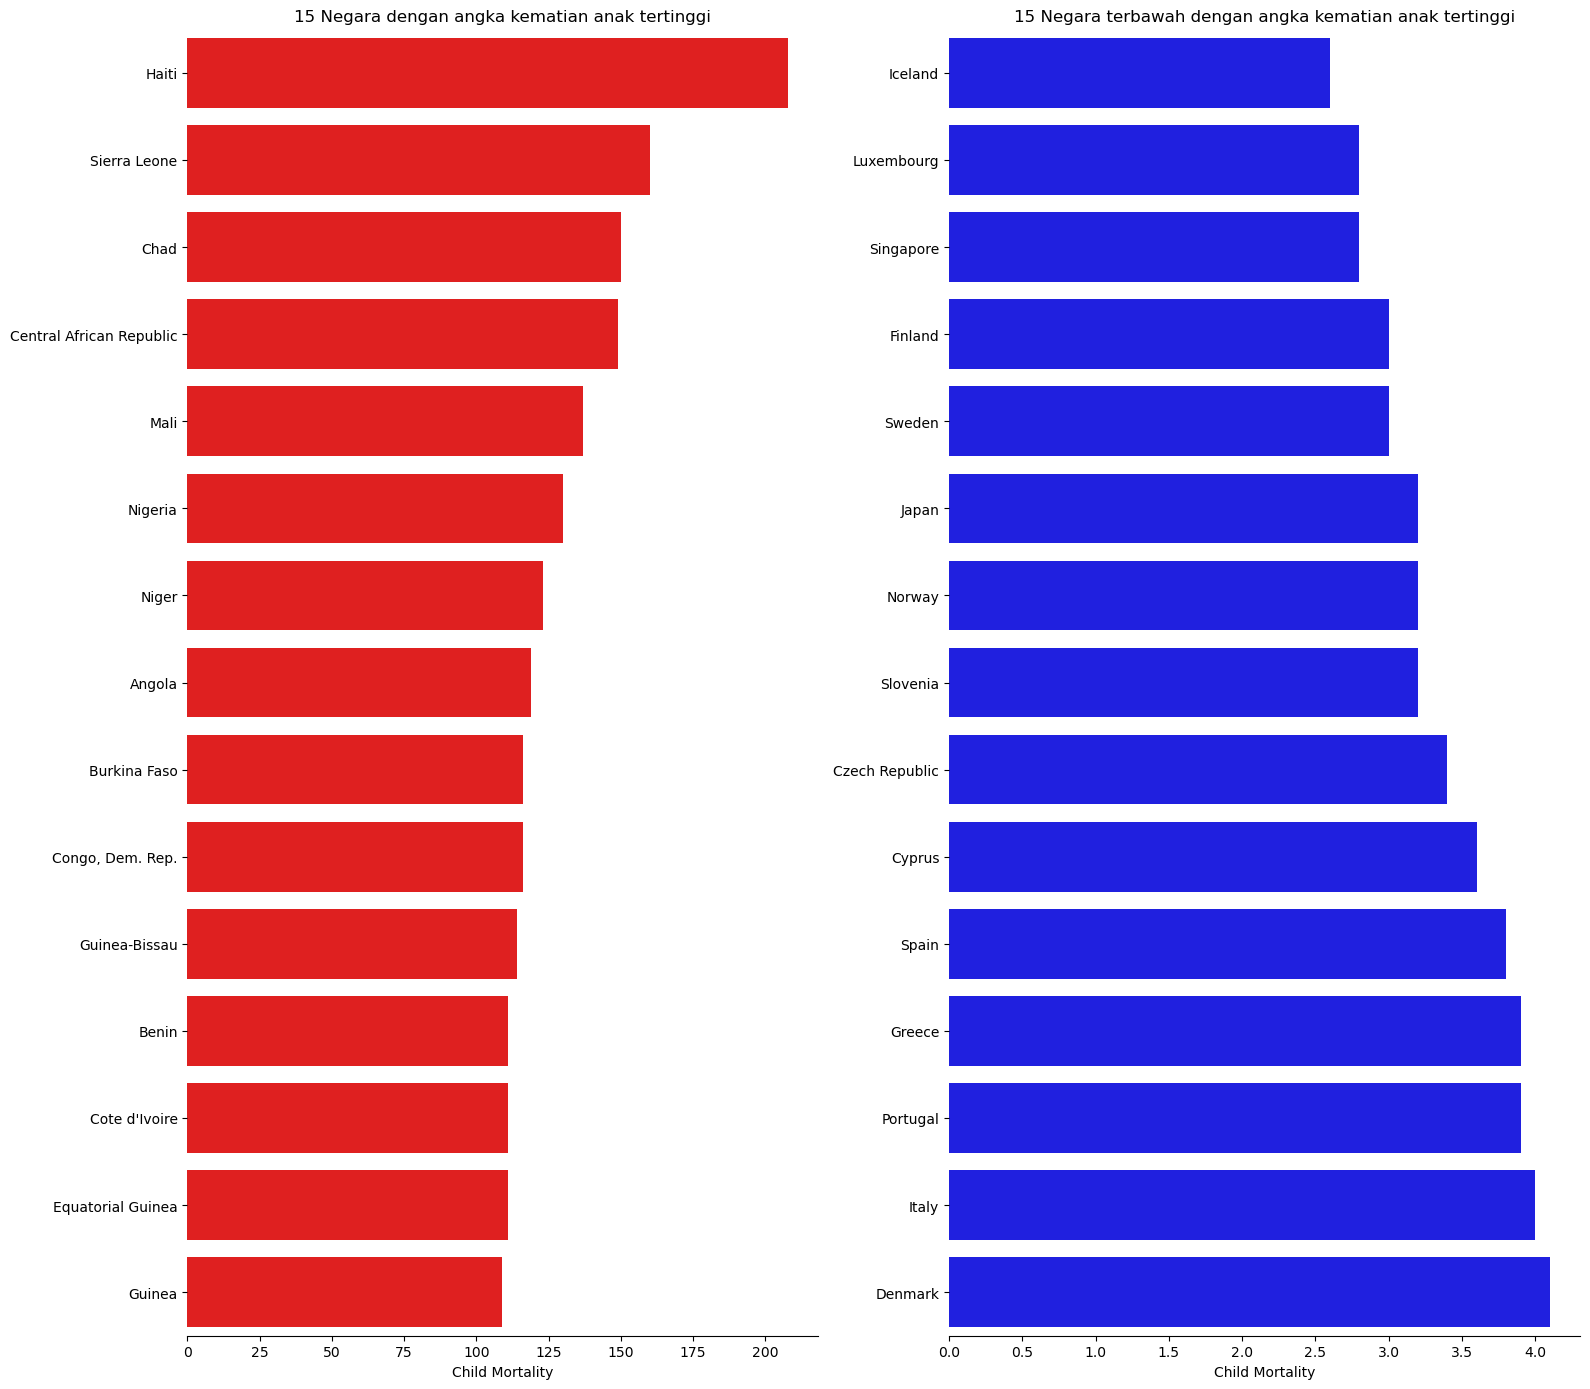

In [12]:
# Visualize top 15 country and bottom 15 country with highest child mortality
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Kematian_anak'])
cml_df = df.nsmallest(15, columns=['Kematian_anak'])
bar_plotting(1, cmt_df, 'Negara', 'Kematian_anak', '15 Negara dengan angka kematian anak tertinggi', 'Child Mortality', 'red')
bar_plotting(2, cml_df, 'Negara', 'Kematian_anak', '15 Negara terbawah dengan angka kematian anak tertinggi', 'Child Mortality', 'blue')
plt.tight_layout()
plt.show()

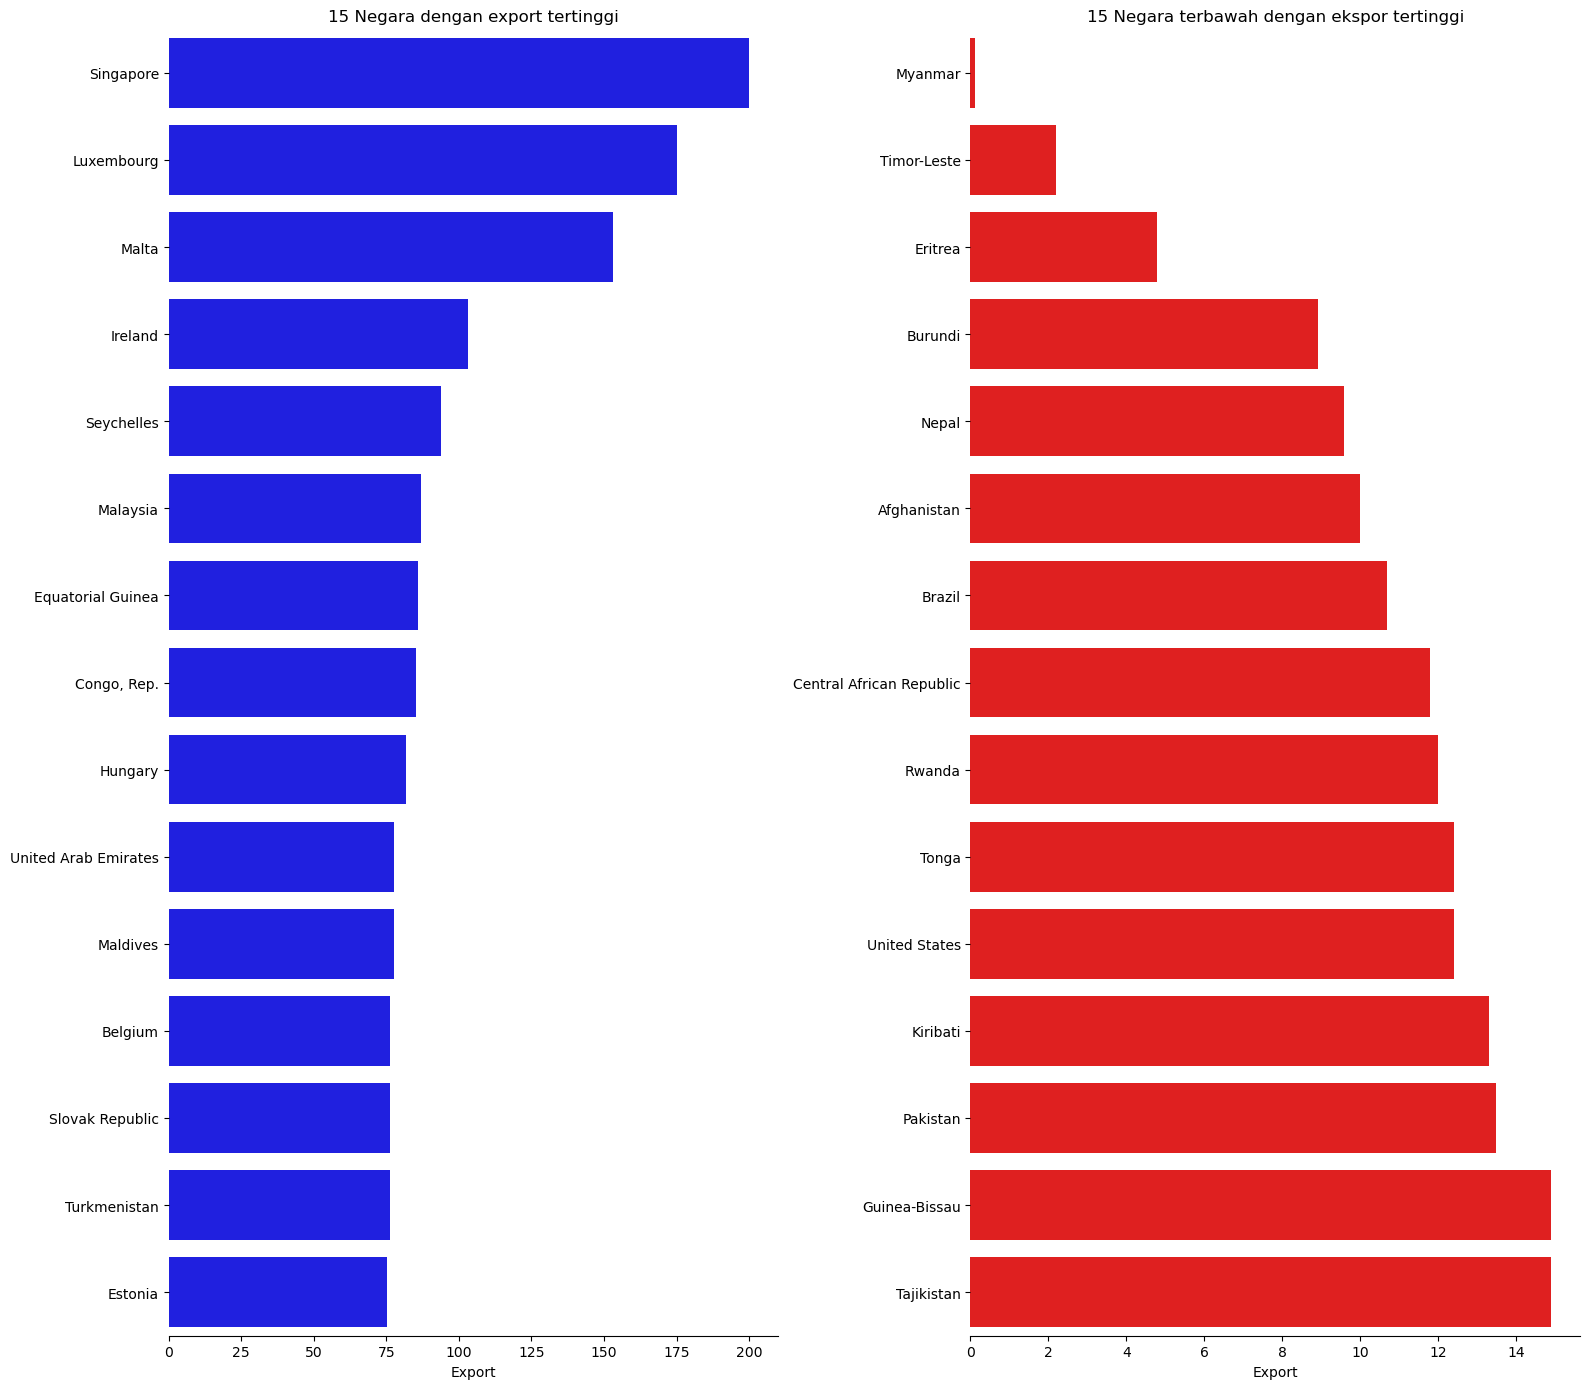

In [13]:
# Visualize top 15 country and bottom 15 country with highest export
plt.figure(figsize=(16,14))
ext_df = df.nlargest(15, columns=['Ekspor'])
exl_df = df.nsmallest(15, columns=['Ekspor'])
bar_plotting(1, ext_df, 'Negara', 'Ekspor', '15 Negara dengan export tertinggi', 'Export', 'blue')
bar_plotting(2, exl_df, 'Negara', 'Ekspor', '15 Negara terbawah dengan ekspor tertinggi', 'Export', 'red')
plt.tight_layout()
plt.show()

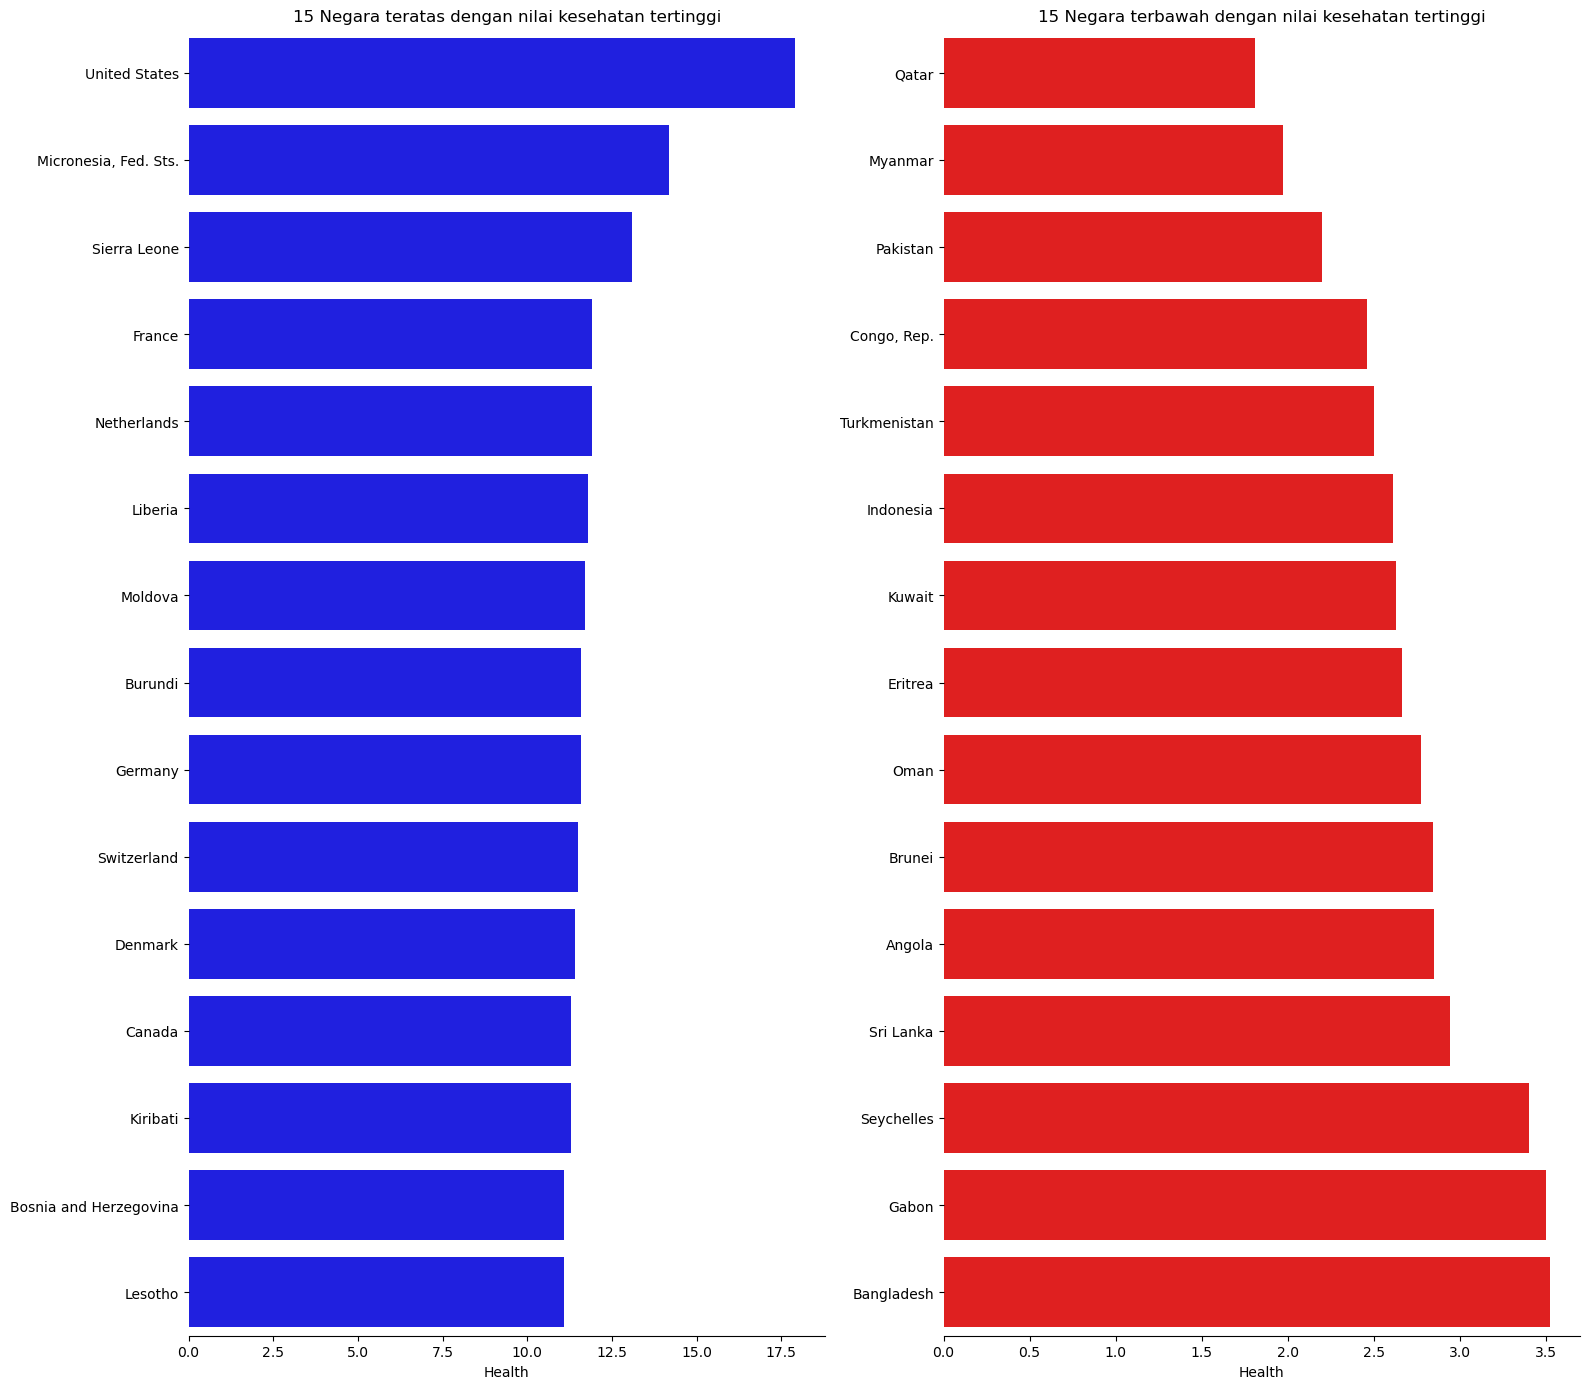

In [14]:
# Visualize top 15 country and bottom 15 country with highest health value
plt.figure(figsize=(16,14))
htt_df = df.nlargest(15, columns=['Kesehatan'])
htl_df = df.nsmallest(15, columns=['Kesehatan'])
bar_plotting(1, htt_df, 'Negara', 'Kesehatan', '15 Negara teratas dengan nilai kesehatan tertinggi', 'Health', 'blue')
bar_plotting(2, htl_df, 'Negara', 'Kesehatan', '15 Negara terbawah dengan nilai kesehatan tertinggi', 'Health', 'red')
plt.tight_layout()
plt.show()


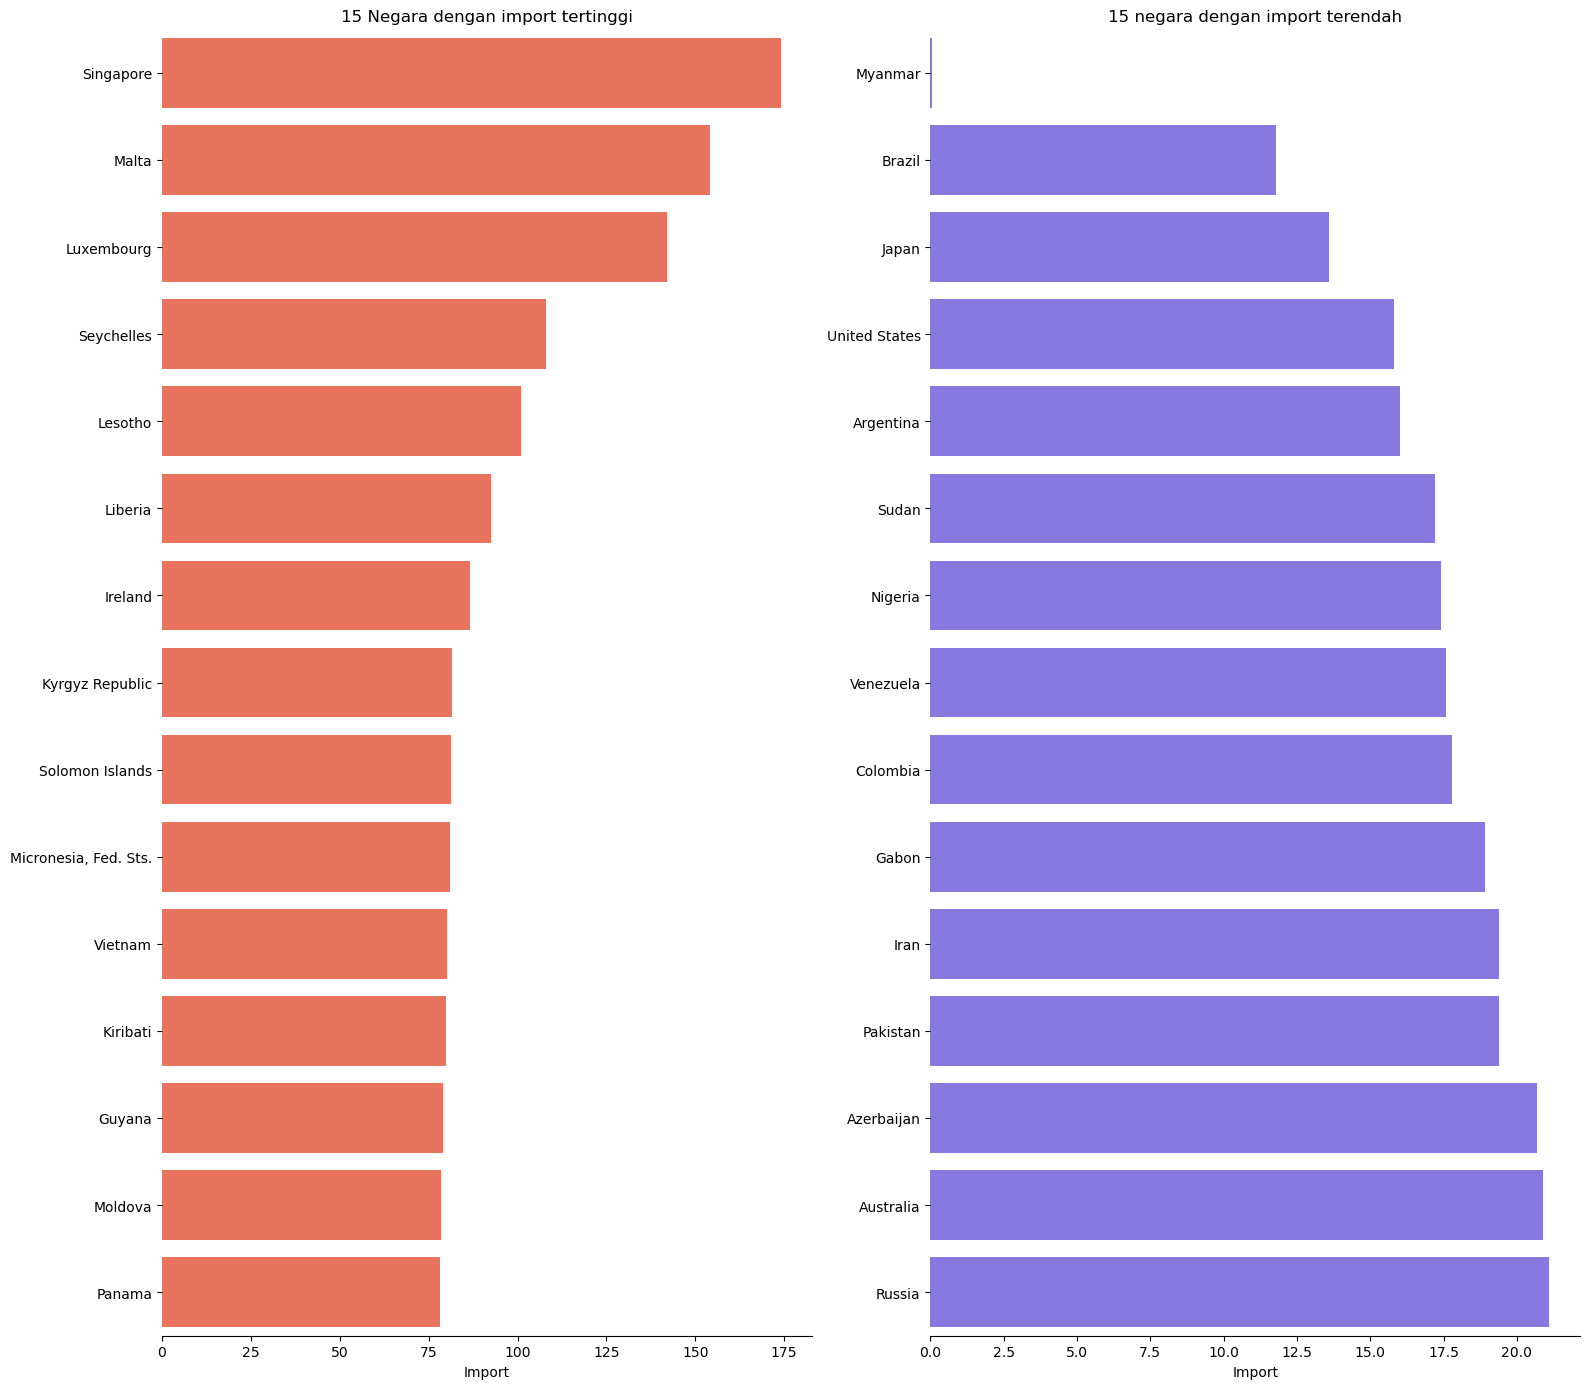

In [15]:
# Visualize top 15 country and bottom 15 country with highest import
plt.figure(figsize=(16,14))
imt_df = df.nlargest(15, columns=['Impor'])
iml_df = df.nsmallest(15, columns=['Impor'])
bar_plotting(1, imt_df, 'Negara', 'Impor', '15 Negara dengan import tertinggi', 'Import', 'tomato')
bar_plotting(2, iml_df, 'Negara', 'Impor', '15 negara dengan import terendah', 'Import', 'mediumslateblue')
plt.tight_layout()
plt.show()

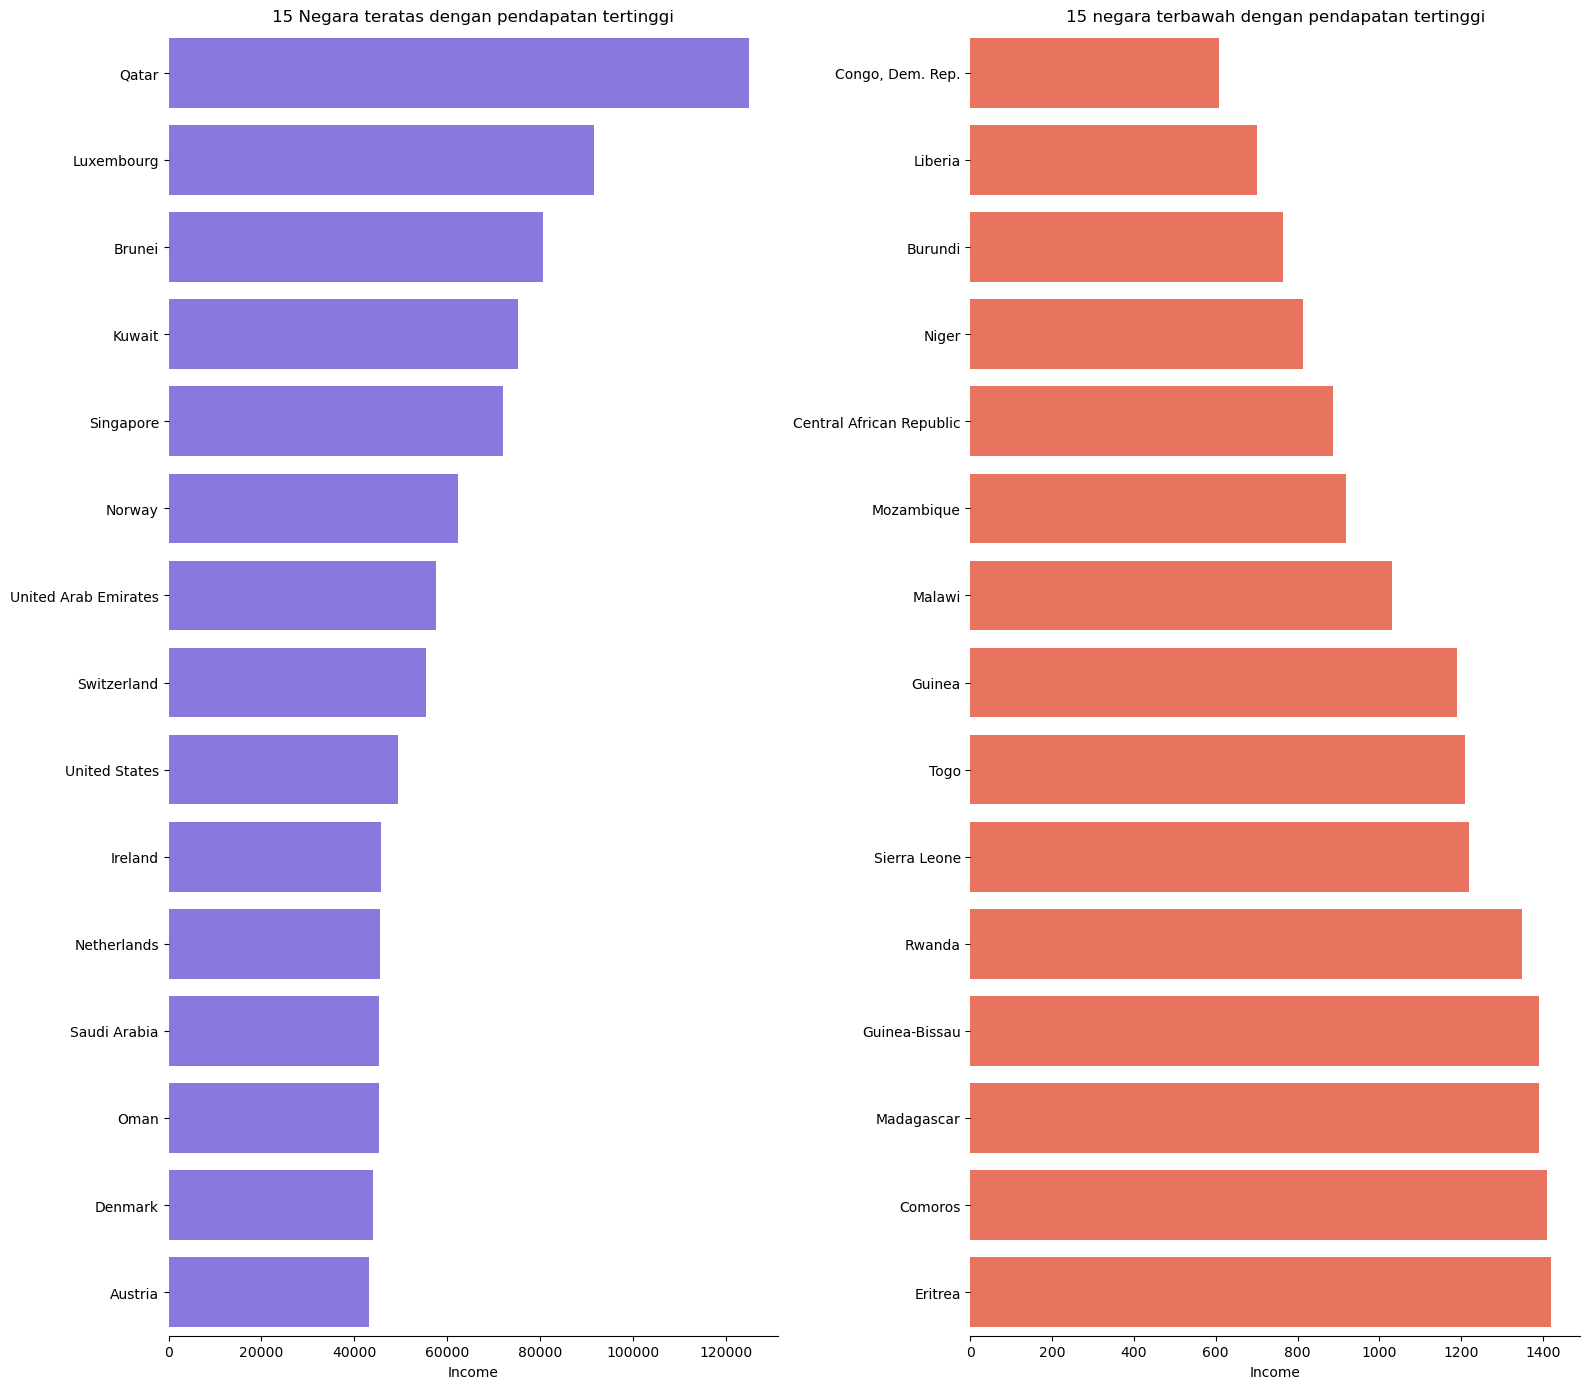

In [16]:
# Visualize top 15 country and bottom 15 country with highest income
plt.figure(figsize=(16,14))
int_df = df.nlargest(15, columns=['Pendapatan'])
inl_df = df.nsmallest(15, columns=['Pendapatan'])
bar_plotting(1, int_df, 'Negara', 'Pendapatan', '15 Negara teratas dengan pendapatan tertinggi', 'Income', 'mediumslateblue')
bar_plotting(2, inl_df, 'Negara', 'Pendapatan', '15 negara terbawah dengan pendapatan tertinggi', 'Income', 'tomato')
plt.tight_layout()
plt.show()

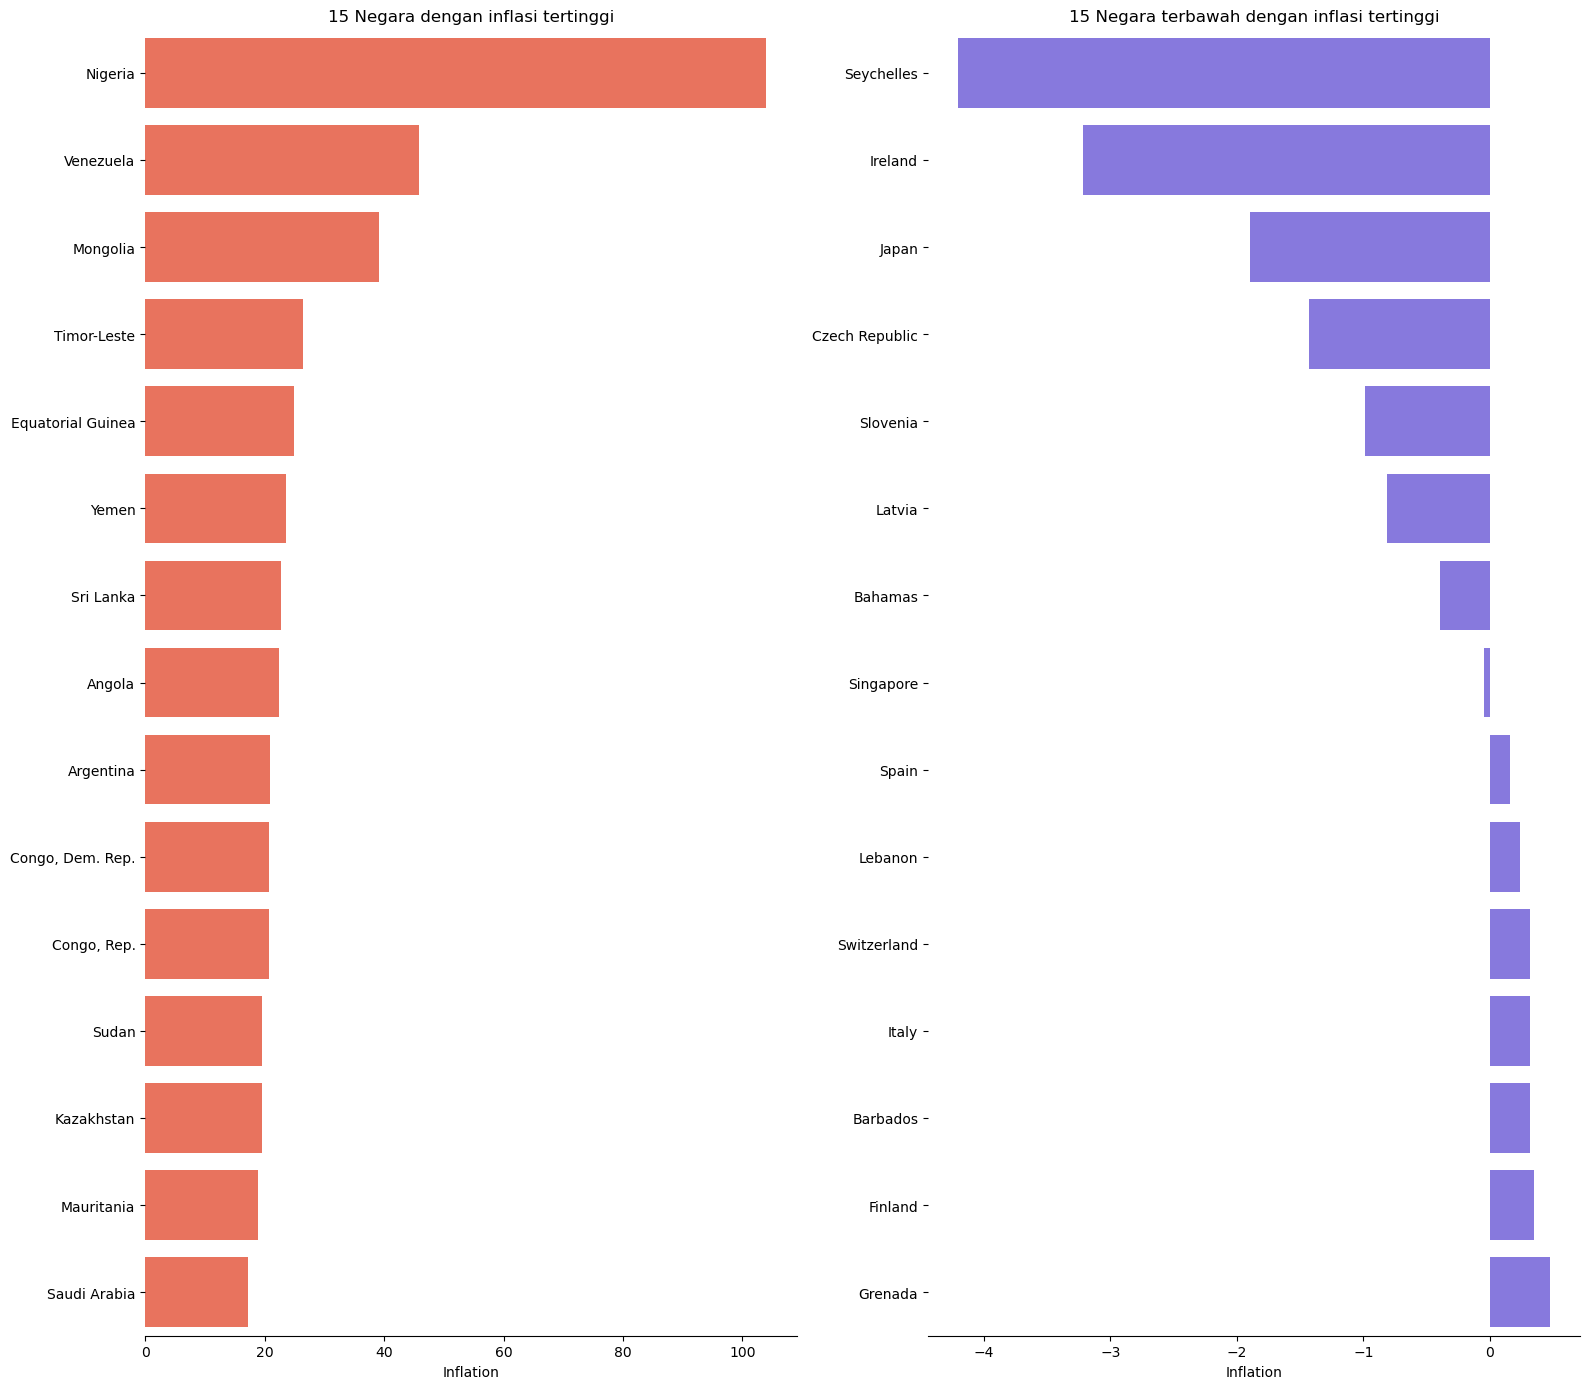

In [17]:
# Visualize top 15 country and bottom 15 country with highest inflation
plt.figure(figsize=(16,14))
ift_df = df.nlargest(15, columns=['Inflasi'])
ifl_df = df.nsmallest(15, columns=['Inflasi'])
bar_plotting(1, ift_df, 'Negara', 'Inflasi', '15 Negara dengan inflasi tertinggi', 'Inflation', 'tomato')
bar_plotting(2, ifl_df, 'Negara', 'Inflasi', '15 Negara terbawah dengan inflasi tertinggi', 'Inflation', 'mediumslateblue')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Nigeria has the highest inflation rate.
* We can also see that Seychelles. has the lowest inflation rate.

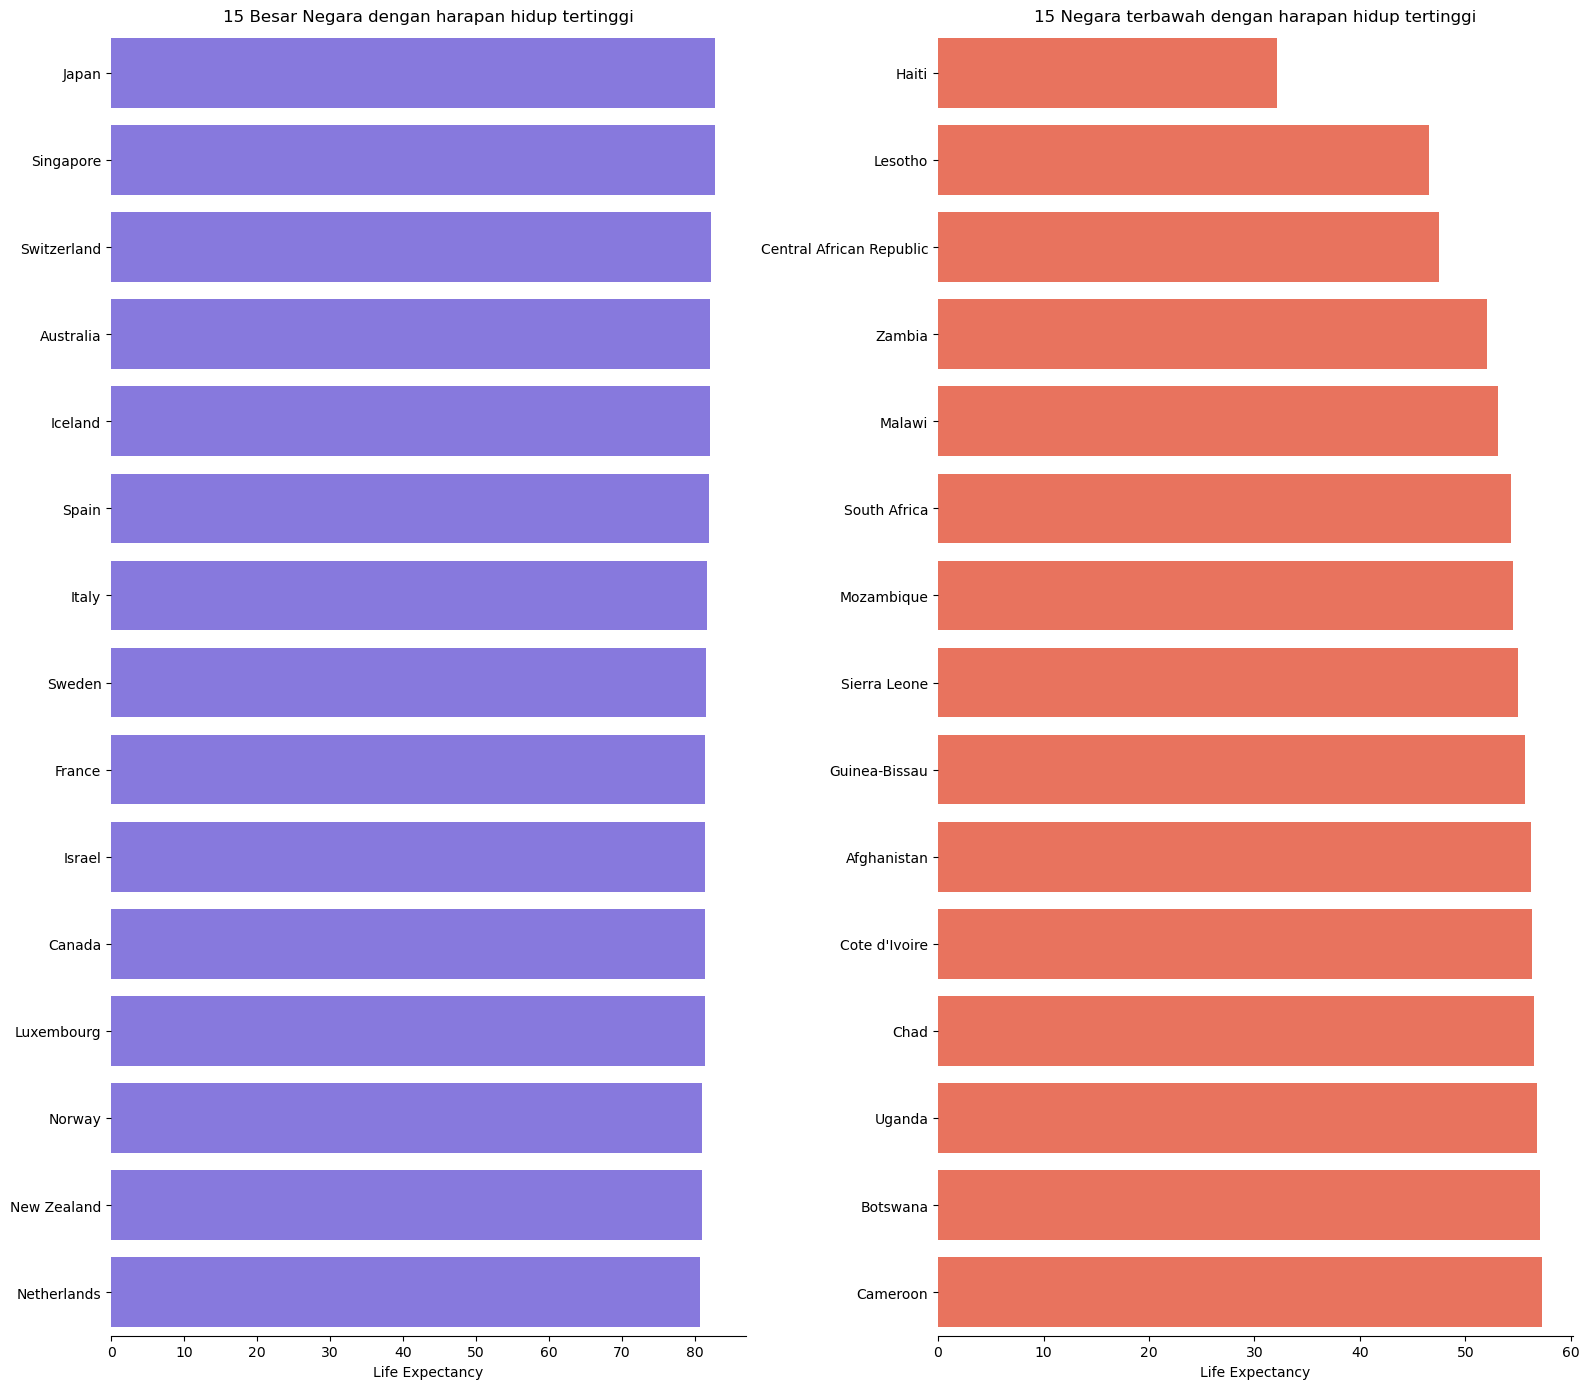

In [18]:
# Visualize top 15 country and bottom 15 country with highest life expectancy
plt.figure(figsize=(16,14))
let_df = df.nlargest(15, columns=['Harapan_hidup'])
lel_df = df.nsmallest(15, columns=['Harapan_hidup'])
bar_plotting(1, let_df, 'Negara', 'Harapan_hidup', '15 Besar Negara dengan harapan hidup tertinggi', 'Life Expectancy', 'mediumslateblue')
bar_plotting(2, lel_df, 'Negara', 'Harapan_hidup', '15 Negara terbawah dengan harapan hidup tertinggi', 'Life Expectancy', 'tomato')
plt.tight_layout()
plt.show()

From bar plots above, we can get several insights. <br />
* We can see that Japan has the highest life expectancy.
* We can also see that Haiti has the lowest life expectancy.

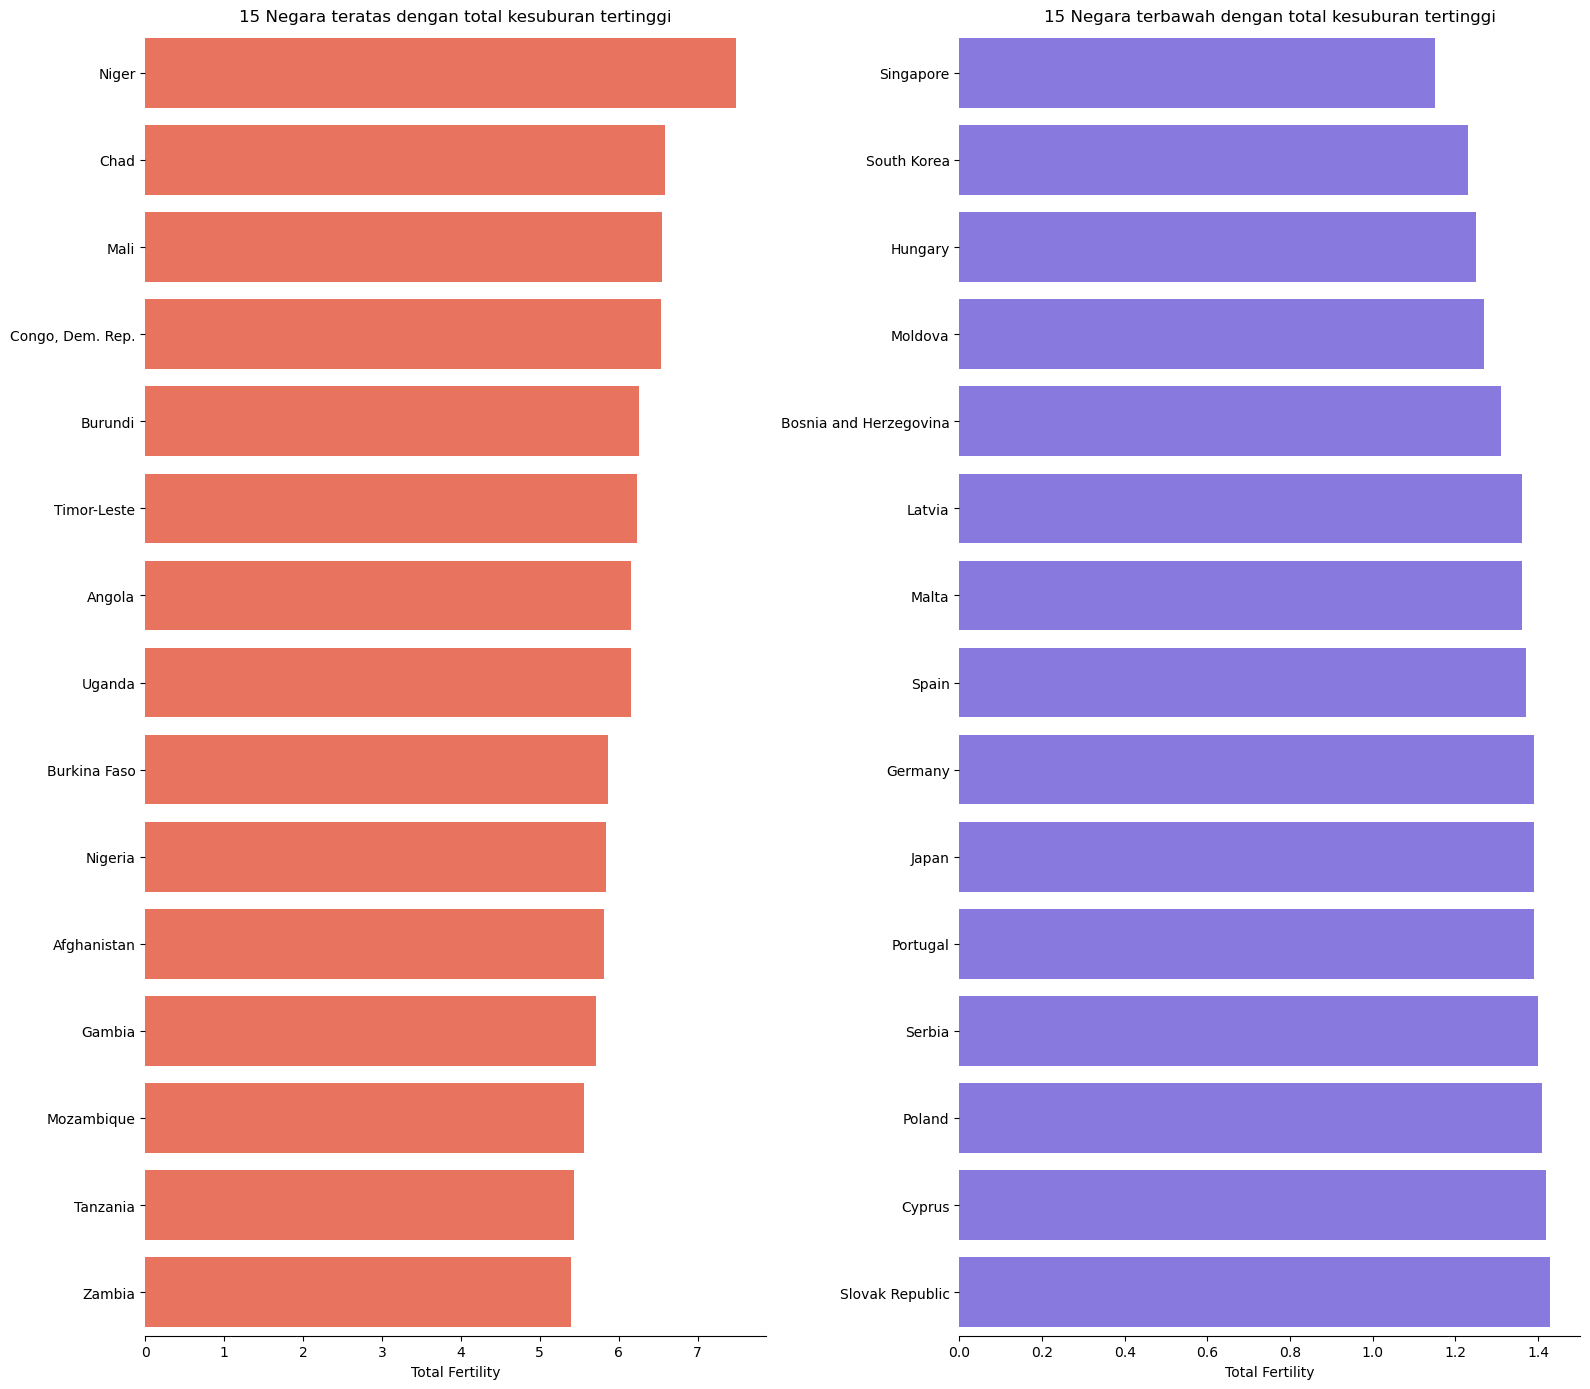

In [19]:
# Visualize top 15 country and bottom 15 country with highest total fertility
plt.figure(figsize=(16,14))
fet_df = df.nlargest(15, columns=['Jumlah_fertiliti'])
fel_df = df.nsmallest(15, columns=['Jumlah_fertiliti'])
bar_plotting(1, fet_df, 'Negara', 'Jumlah_fertiliti', '15 Negara teratas dengan total kesuburan tertinggi', 'Total Fertility', 'tomato')
bar_plotting(2, fel_df, 'Negara', 'Jumlah_fertiliti', '15 Negara terbawah dengan total kesuburan tertinggi', 'Total Fertility', 'mediumslateblue')
plt.tight_layout()
plt.show()

* Kita dapat melihat bahwa Niger memiliki total kesuburan tertinggi.
* Kita juga dapat melihat bahwa Singapura memiliki total kesuburan terendah.

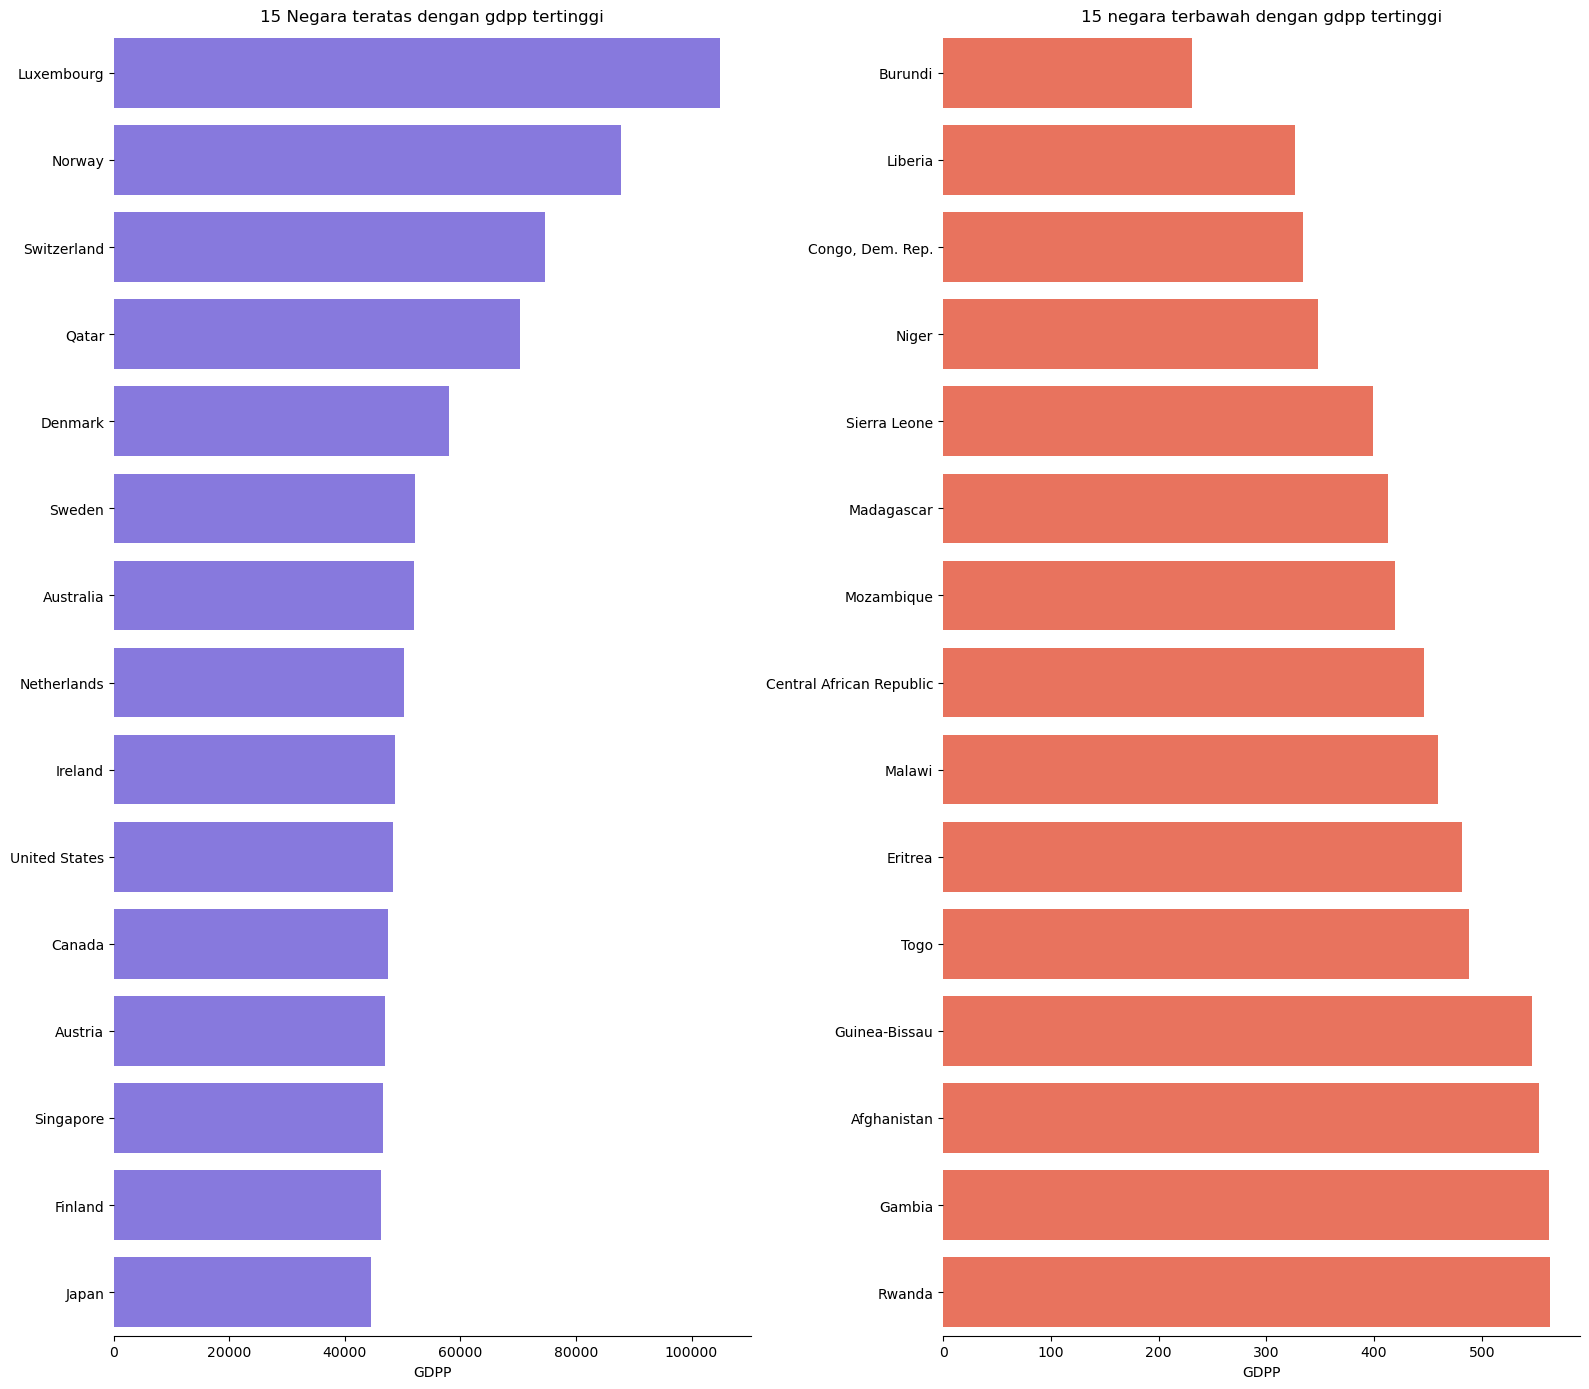

In [20]:
# Visualize top 15 country and bottom 15 country with highest gdpp
plt.figure(figsize=(16,14))
gdt_df = df.nlargest(15, columns=['GDPperkapita'])
gdl_df = df.nsmallest(15, columns=['GDPperkapita'])
bar_plotting(1, gdt_df, 'Negara', 'GDPperkapita', '15 Negara teratas dengan gdpp tertinggi', 'GDPP', 'mediumslateblue')
bar_plotting(2, gdl_df, 'Negara', 'GDPperkapita', '15 negara terbawah dengan gdpp tertinggi', 'GDPP', 'tomato')
plt.tight_layout()
plt.show()

* Kita dapat melihat bahwa Luksemburg memiliki GDPP tertinggi.
* Kita juga dapat melihat bahwa Burundi memiliki GDPP terendah.

---
---

#### 2.5 Multivariate Analysis

<Figure size 1600x1400 with 0 Axes>

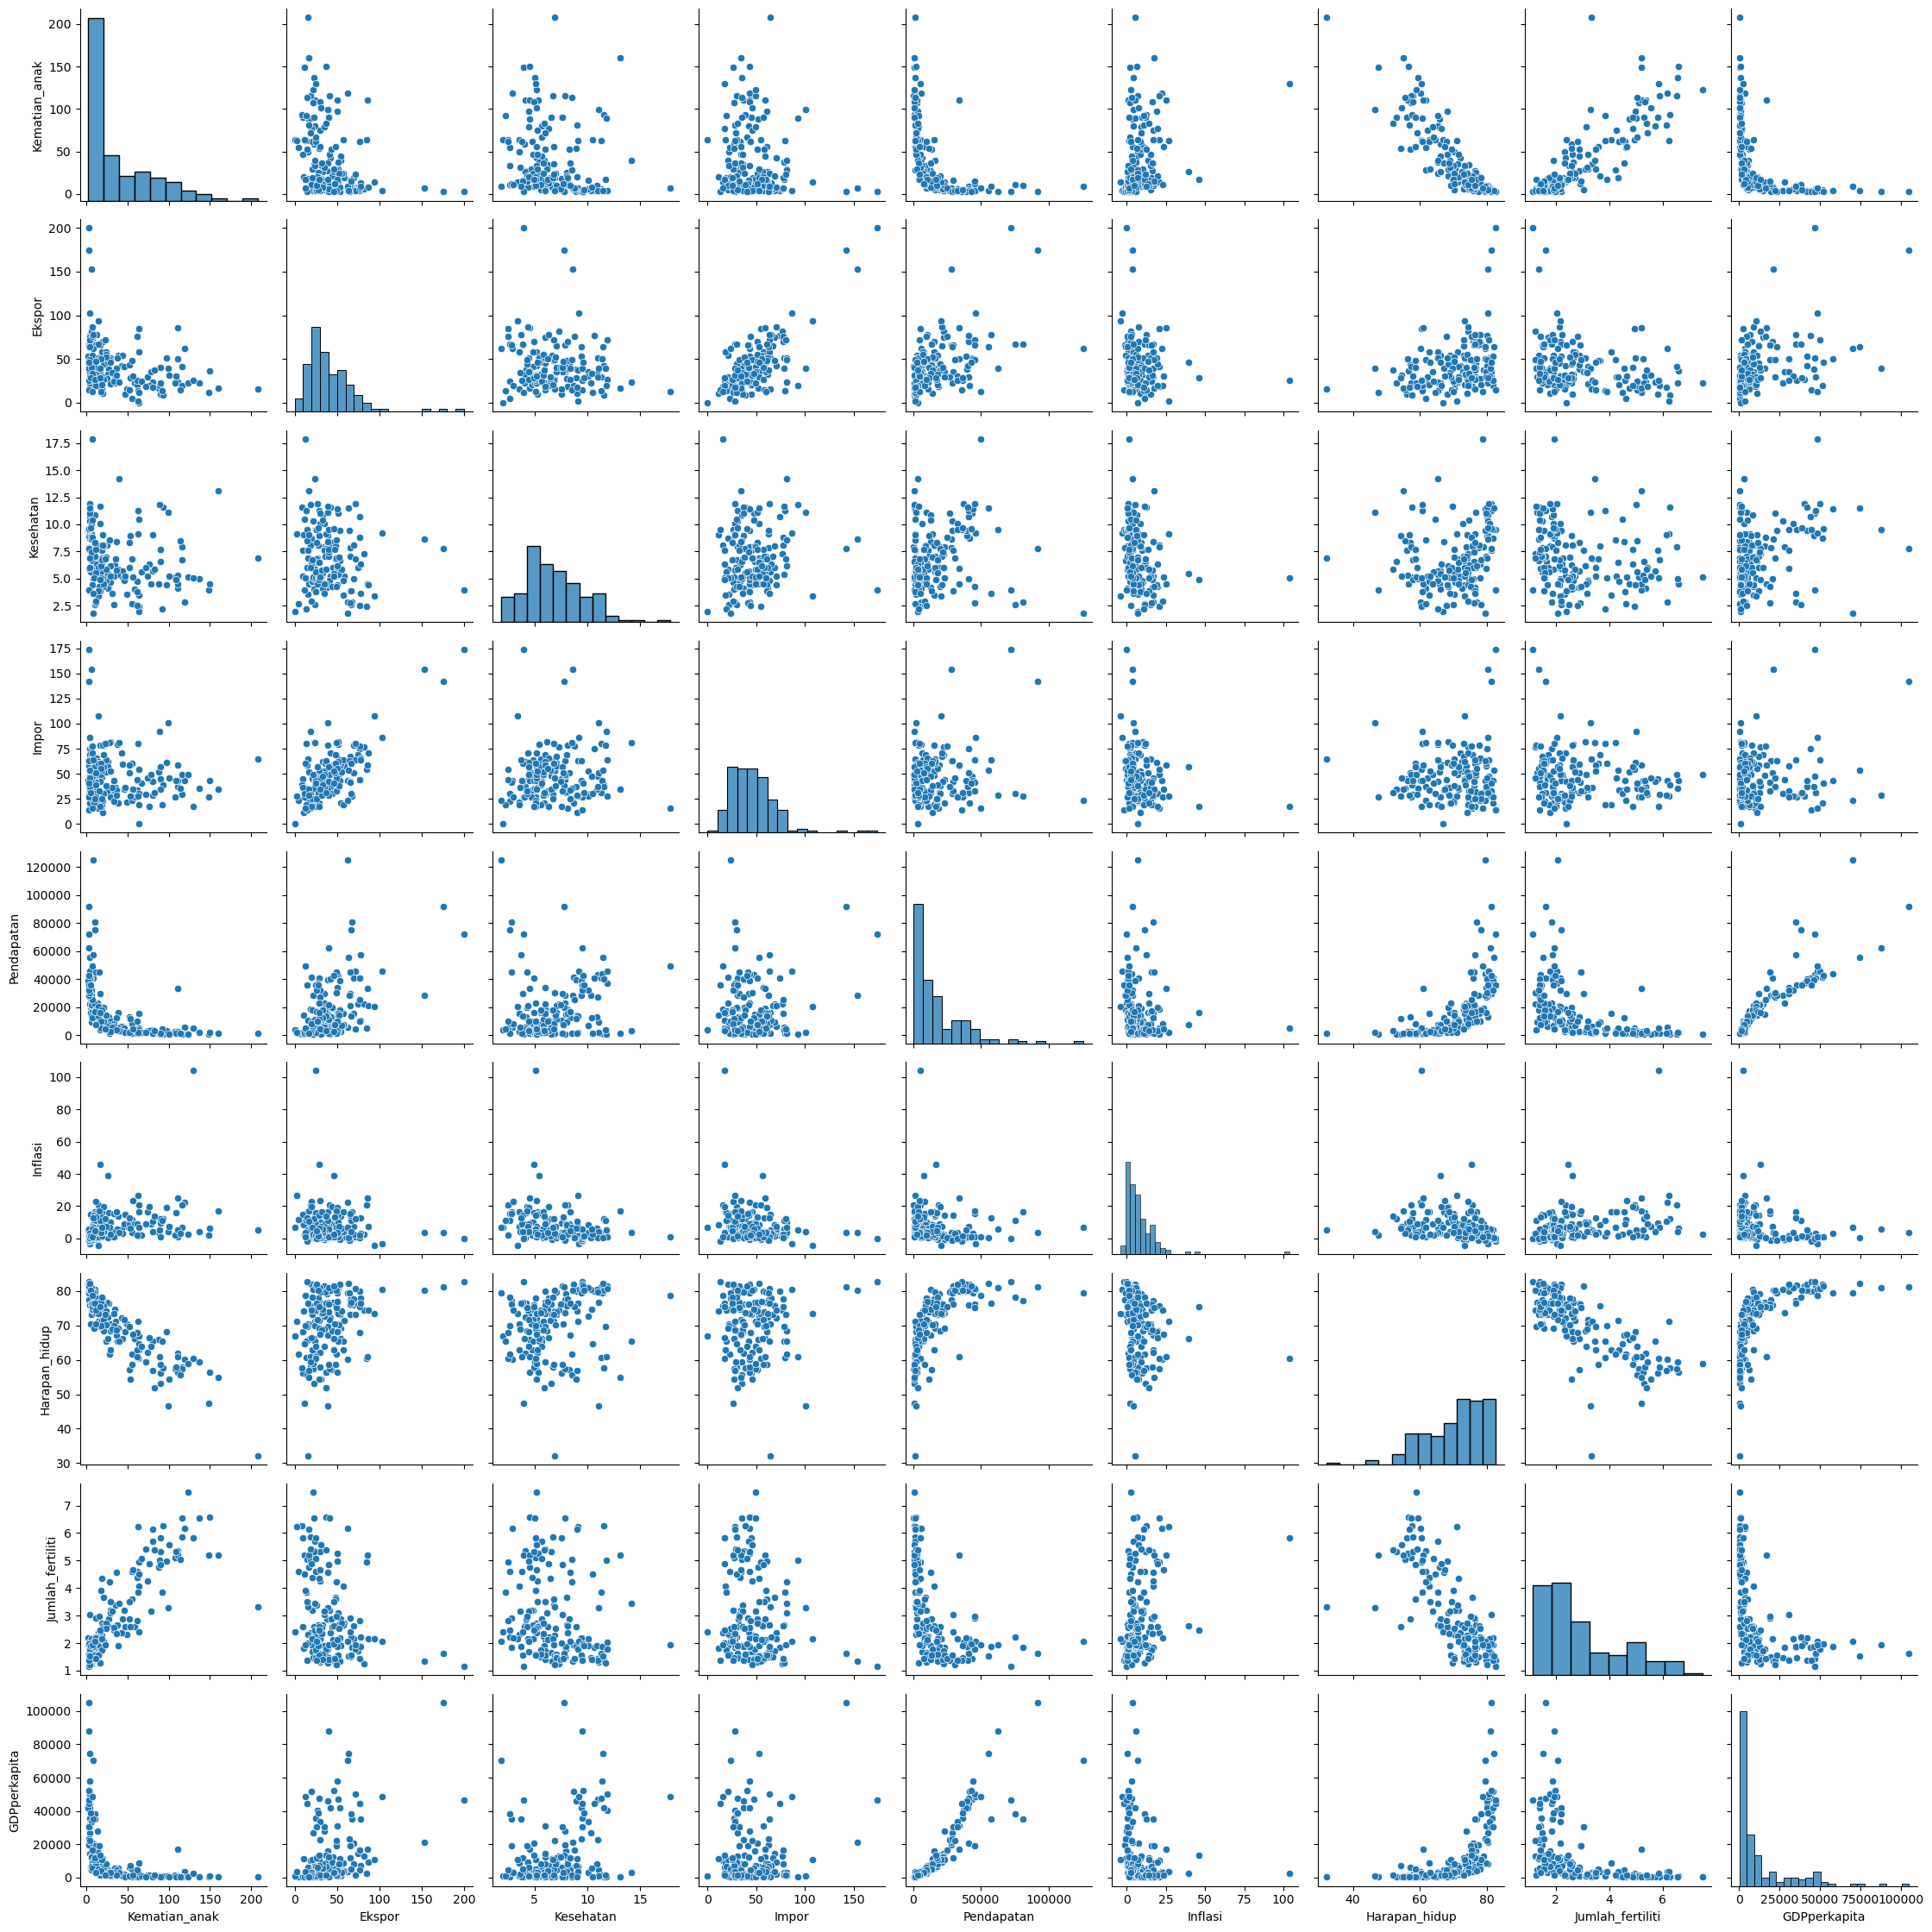

In [21]:
# Visualize data with pairplot to show connections between variables
plt.figure(figsize=(16,14))
sns.pairplot(df)
plt.tight_layout()
plt.show()

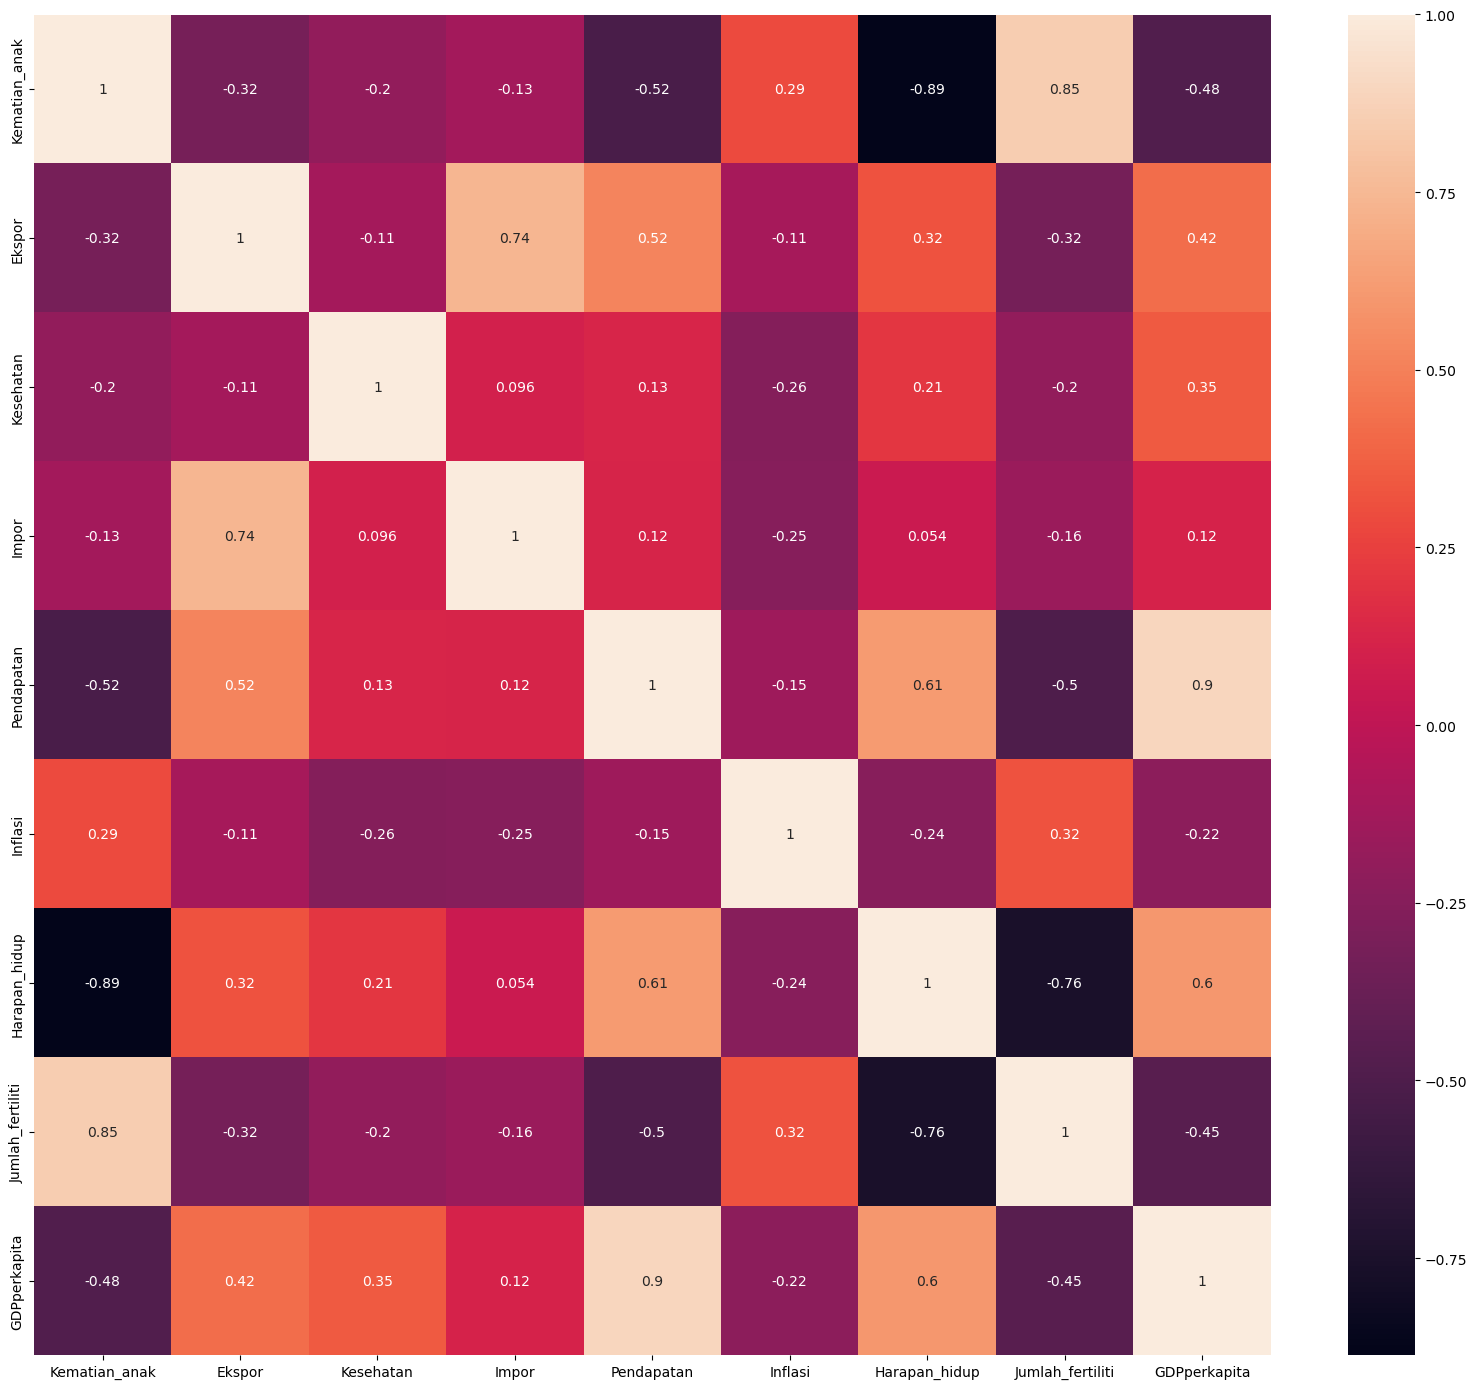

In [22]:
# Visualize data with heatmap to show correlation between variables
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(16, 14))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2g')
plt.tight_layout()
plt.show()

(---- *Perhatikan bahwa
jika a dan b berkorelasi positif, artinya jika a meningkat, maka b juga akan meningkat. Sebaliknya, jika a dan b berkorelasi negatif, artinya jika a meningkat, maka b akan menurun.** ----) <br/><br/>
Dari pairplot dan heatmap di atas, kita bisa mendapatkan beberapa insight. <br />
* 'PDBperkapita' dan 'Pendapatan' memiliki korelasi positif yang tinggi (0,9). Ini berarti negara-negara yang memiliki 'Pendapatan' yang tinggi juga akan memiliki 'PDBperkapita' yang tinggi.
* 'Kematian_anak' dan 'Jumlah_fertiliti' juga memiliki korelasi positif yang tinggi (0,85).
* 'Impor' dan 'Ekspor' juga memiliki korelasi positif yang tinggi (0,74).
* 'Pendapatan' dan 'Harapan_hidup' juga memiliki korelasi positif yang tinggi (0,61).
* 'PDBperkapita' dan 'Harapan_hidup' juga memiliki korelasi positif yang tinggi (0,6).
* 'Harapan_hidup' dan 'Jumlah_fertiliti' memiliki korelasi negatif yang tinggi (-0,76). Ini berarti negara-negara yang memiliki 'Harapan_hidup' tinggi akan memiliki 'Jumlah_fertiliti' yang rendah.
* 'Harapan_hidup' dan 'Kematian_anak' juga memiliki korelasi negatif yang tinggi (-0,89).

---
---

# **3. Outliers Treatment** <br/> 

(---- ***The Following Statements Are Taken From Kaggle*** ----) <br/>
There are different ranges in capping the outliers:
* Soft range: 1th and 99th percentile.
* Mid range: 5th and 95th percentile.
* 25th and 75th percentile.

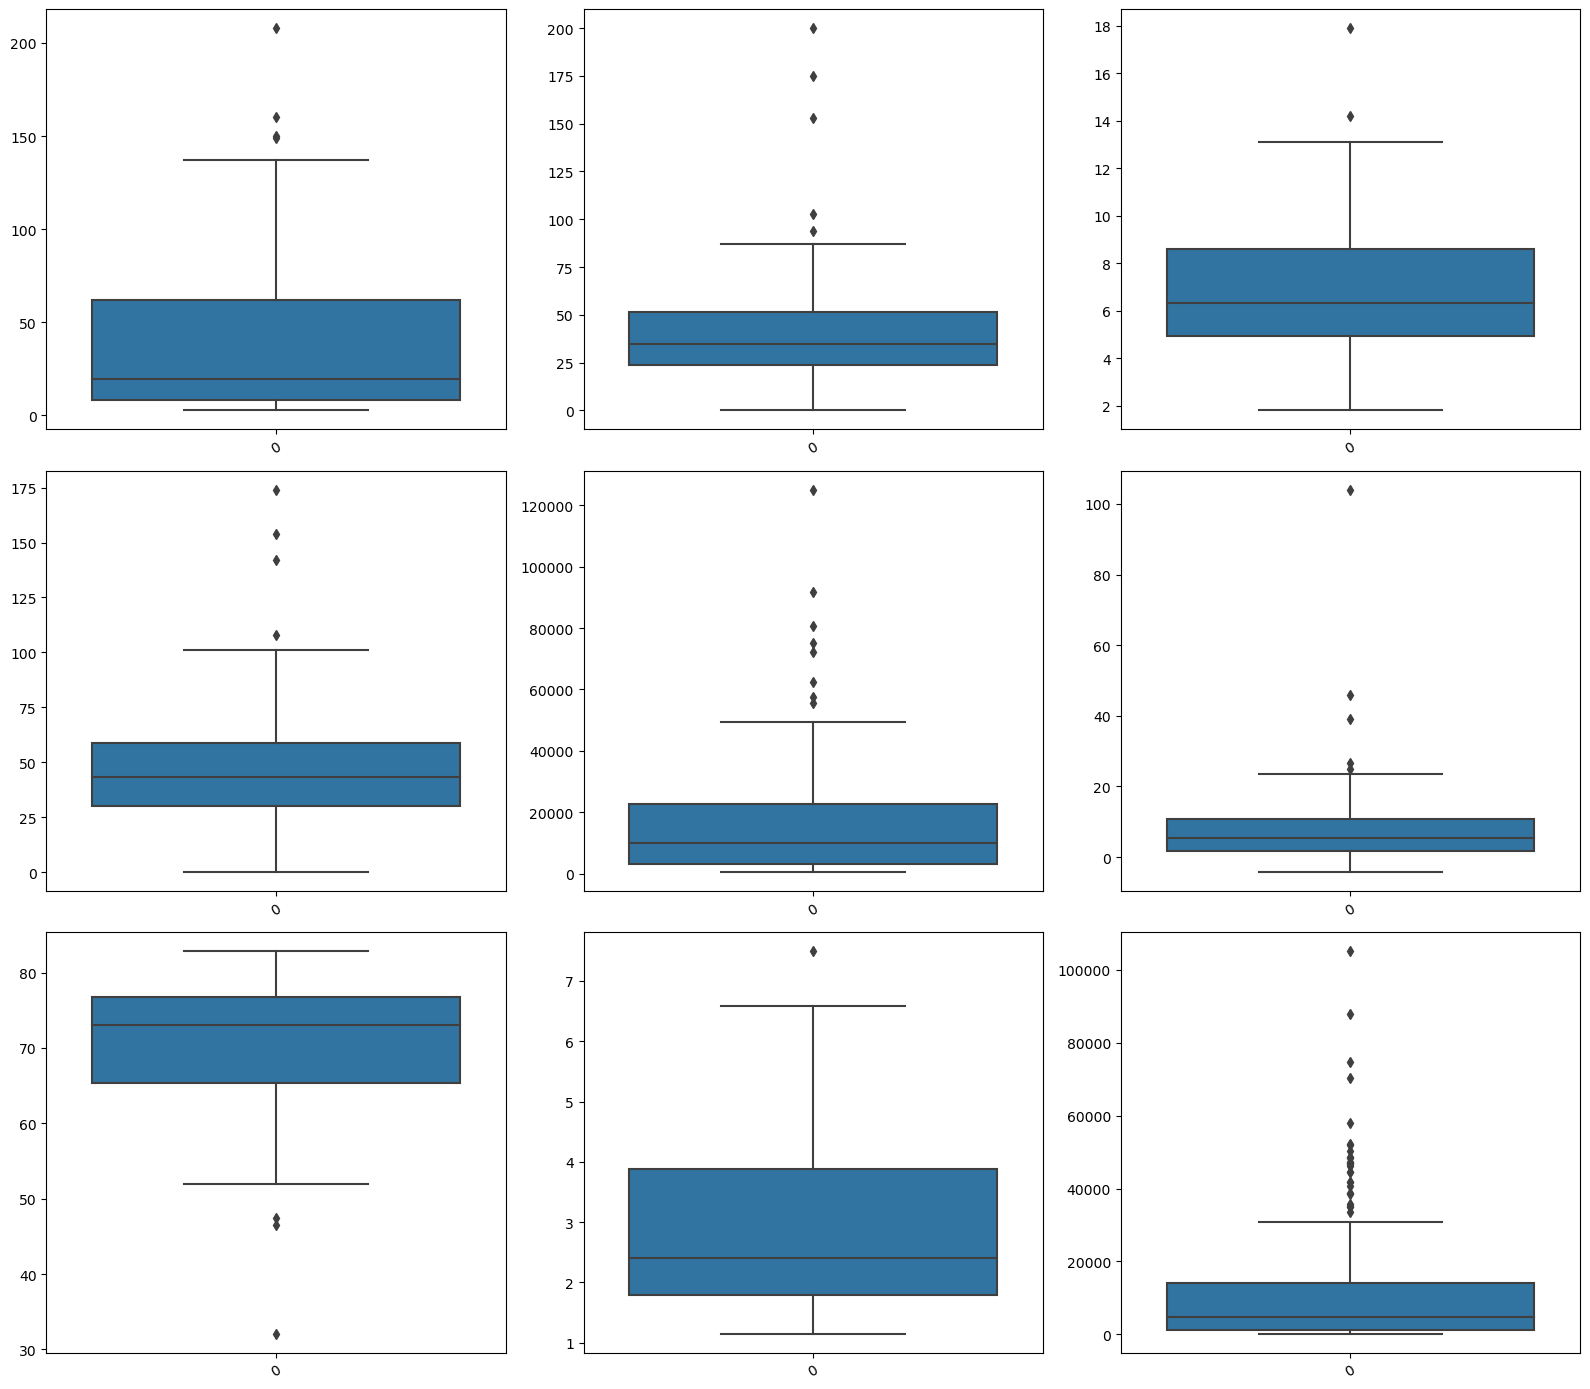

In [23]:
# Visualize numerical columns with boxplots to see outliers
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Dari boxplot di atas, kita tahu bahwa setiap kolom dari dataframe memiliki pencilan. Meskipun pencilan dapat mempengaruhi hasil pengelompokan, pencilan tidak dapat dihilangkan. Penghapusan outlier akan berdampak pada pemeringkatan negara-negara yang membutuhkan bantuan keuangan dari HELP International. Oleh karena itu, kami akan menggunakan pendekatan lain dengan membatasi pencilan karena tujuan kami adalah untuk menemukan daftar negara yang membutuhkan bantuan keuangan dari HELP International. Oleh karena itu, kami dapat membatasi sebagian kecil dari pencilan. Untuk meminimalisir bias, pembatasan akan didasarkan pada persentil ke-99. </br>
</br>
Pencilan dibatasi dalam fitur-fitur ini (Sebagian besar fitur pencilan) : 'Ekspor', 'Impor' , 'Pendapatan', 'Kesehatan', 'Inflasi' and 'GDPperkapita' </br>
</br>
Pencilan tidak dibatasi dalam fitur-fitur ini : 'Kematian_anak', 'Harapan_hidup' , and 'Jumlah_fertiliti'.</br>

In [24]:
# Cap the outliers
cap_features = ['Ekspor', 'Kesehatan' ,'Impor' ,'Pendapatan' ,'Inflasi' , 'GDPperkapita']
new_df = df.copy()
for col in cap_features:
    q4 = new_df[col].quantile(0.99)
    new_df.loc[new_df[col] >= q4, col] = q4

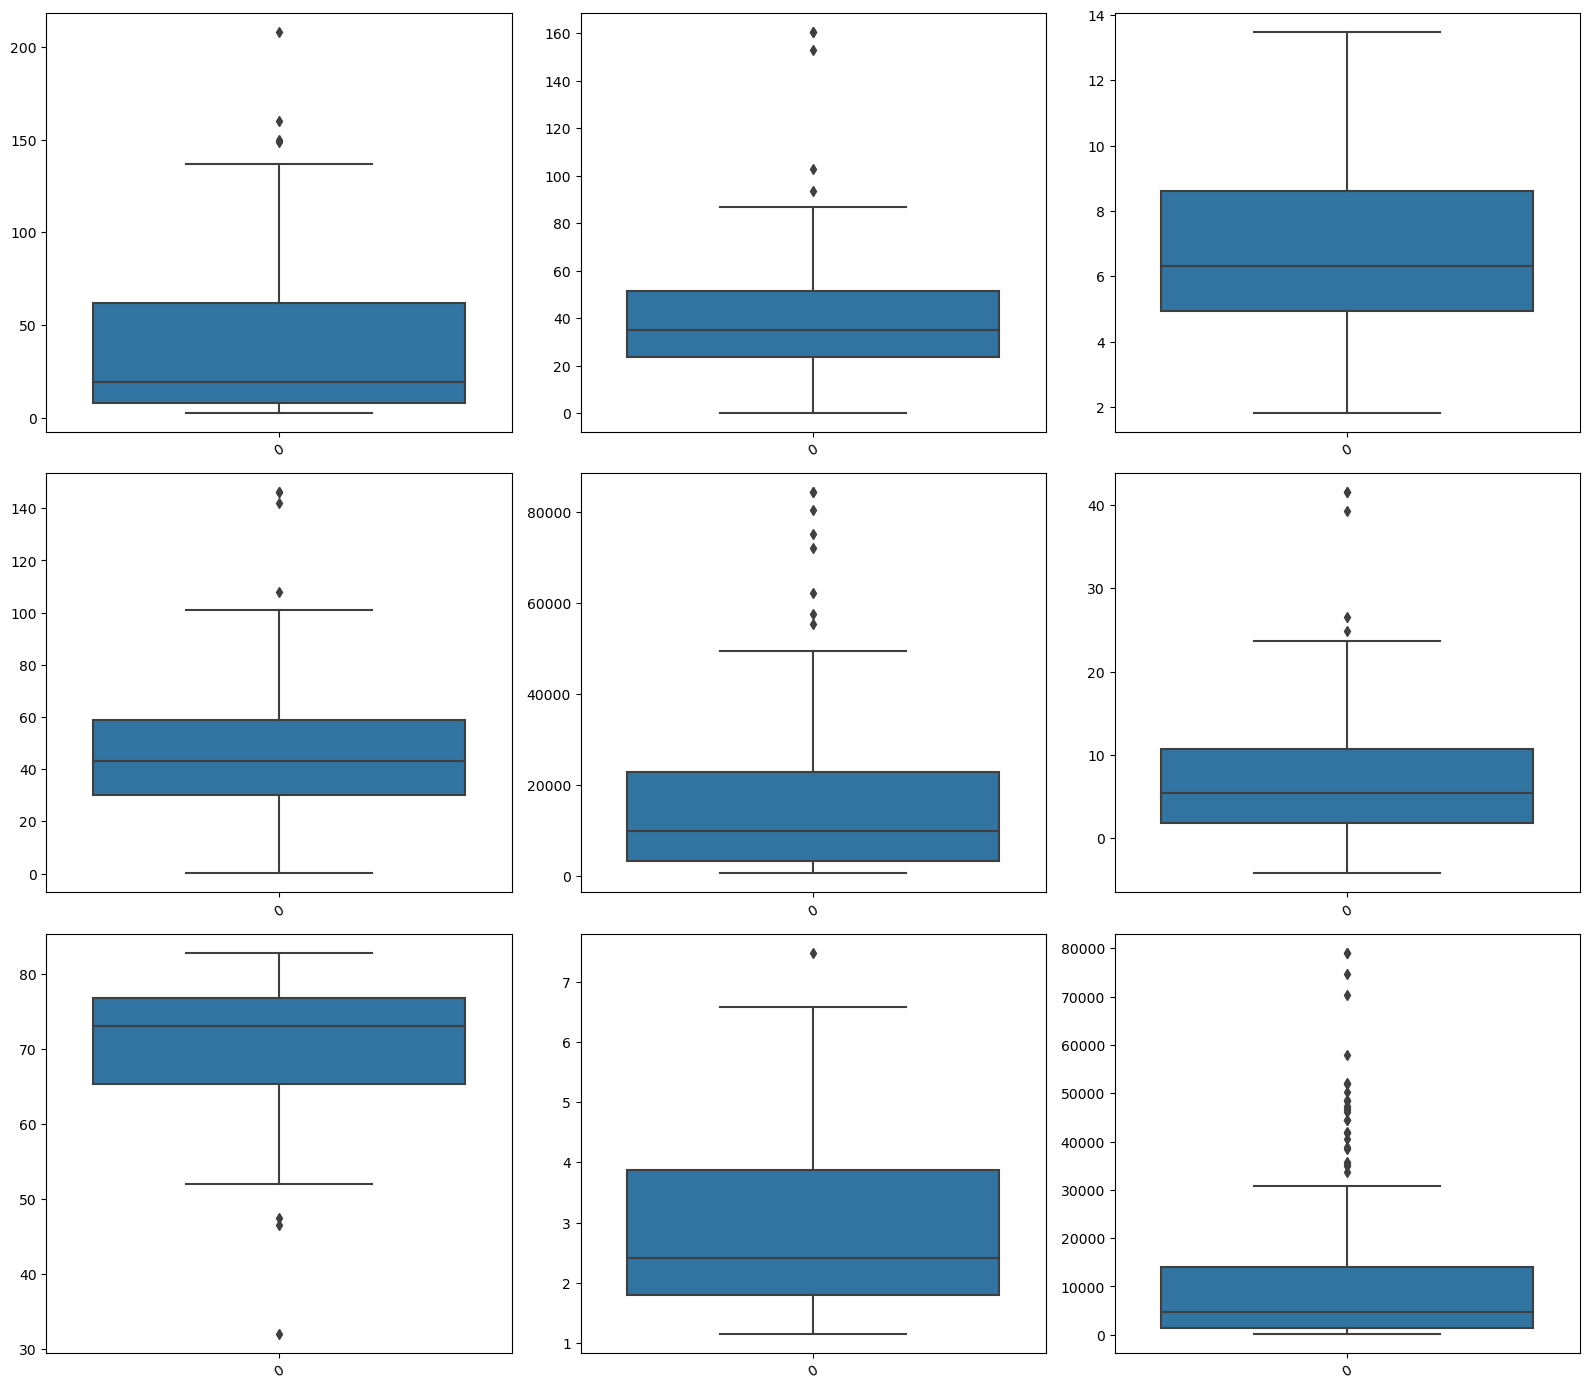

In [25]:
# Visualize numerical columns with boxplots after capping the outliers
plt.figure(figsize=(16,14))

for i in enumerate(new_df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(new_df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

---
---

# **4. Scaling Data** <br/> 

To make the clustering more accurate, we standardize the data by rescaling it using the standard scaler provided by scikit-learn.

In [26]:
# Drop non-numeric column so we can rescale the data
num_df = new_df.drop(columns='Negara')
display(num_df)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.620,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500.0,41.478,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.100,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.600,67.5,4.67,1310.0


In [27]:
# Rescale the data using Standard Scaler
sc = StandardScaler()
scaled_df = sc.fit_transform(num_df)
scaled_df

array([[ 1.29153238, -1.19927911,  0.30123858, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.49806893, -0.08896601, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.09292528, -0.99060381, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541,  1.21600038,  0.02089742, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.42015669, -0.60797601, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.14746385, -0.33900002, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [28]:
# Check the top 5 rows of scaled dataframe
scaled_df = pd.DataFrame(scaled_df, columns = num_df.columns)
display(scaled_df.head())

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.199279,0.301239,-0.076771,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.498069,-0.088966,0.083204,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.092925,-0.990604,-0.660465,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,0.838126,-1.490672,-0.163244,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,0.183663,-0.285963,0.528541,0.125254,-0.764618,0.704258,-0.541946,-0.032042


---
---

# **5. Creating KMeans Clustering and Visualizing Clusters Formed** <br/> 

**Create random clustering first and visualize it**

In [29]:
# Clustering with n_cluster 2
kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(scaled_df)
labels1 = kmeans1.labels_

In [30]:
# Check after 2-clustering
print('n-cluster = 2 (Not a good cluster)')
print()
_tempdf = new_df.copy()
_tempdf['kmeans_2cluster'] = labels1
print('Cluster and its countries quantity :')
display(_tempdf.kmeans_2cluster.value_counts(ascending=True))
print()
display(_tempdf.head())

n-cluster = 2 (Not a good cluster)

Cluster and its countries quantity :


kmeans_2cluster
1    72
0    95
Name: count, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,kmeans_2cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


<Figure size 1600x2000 with 0 Axes>

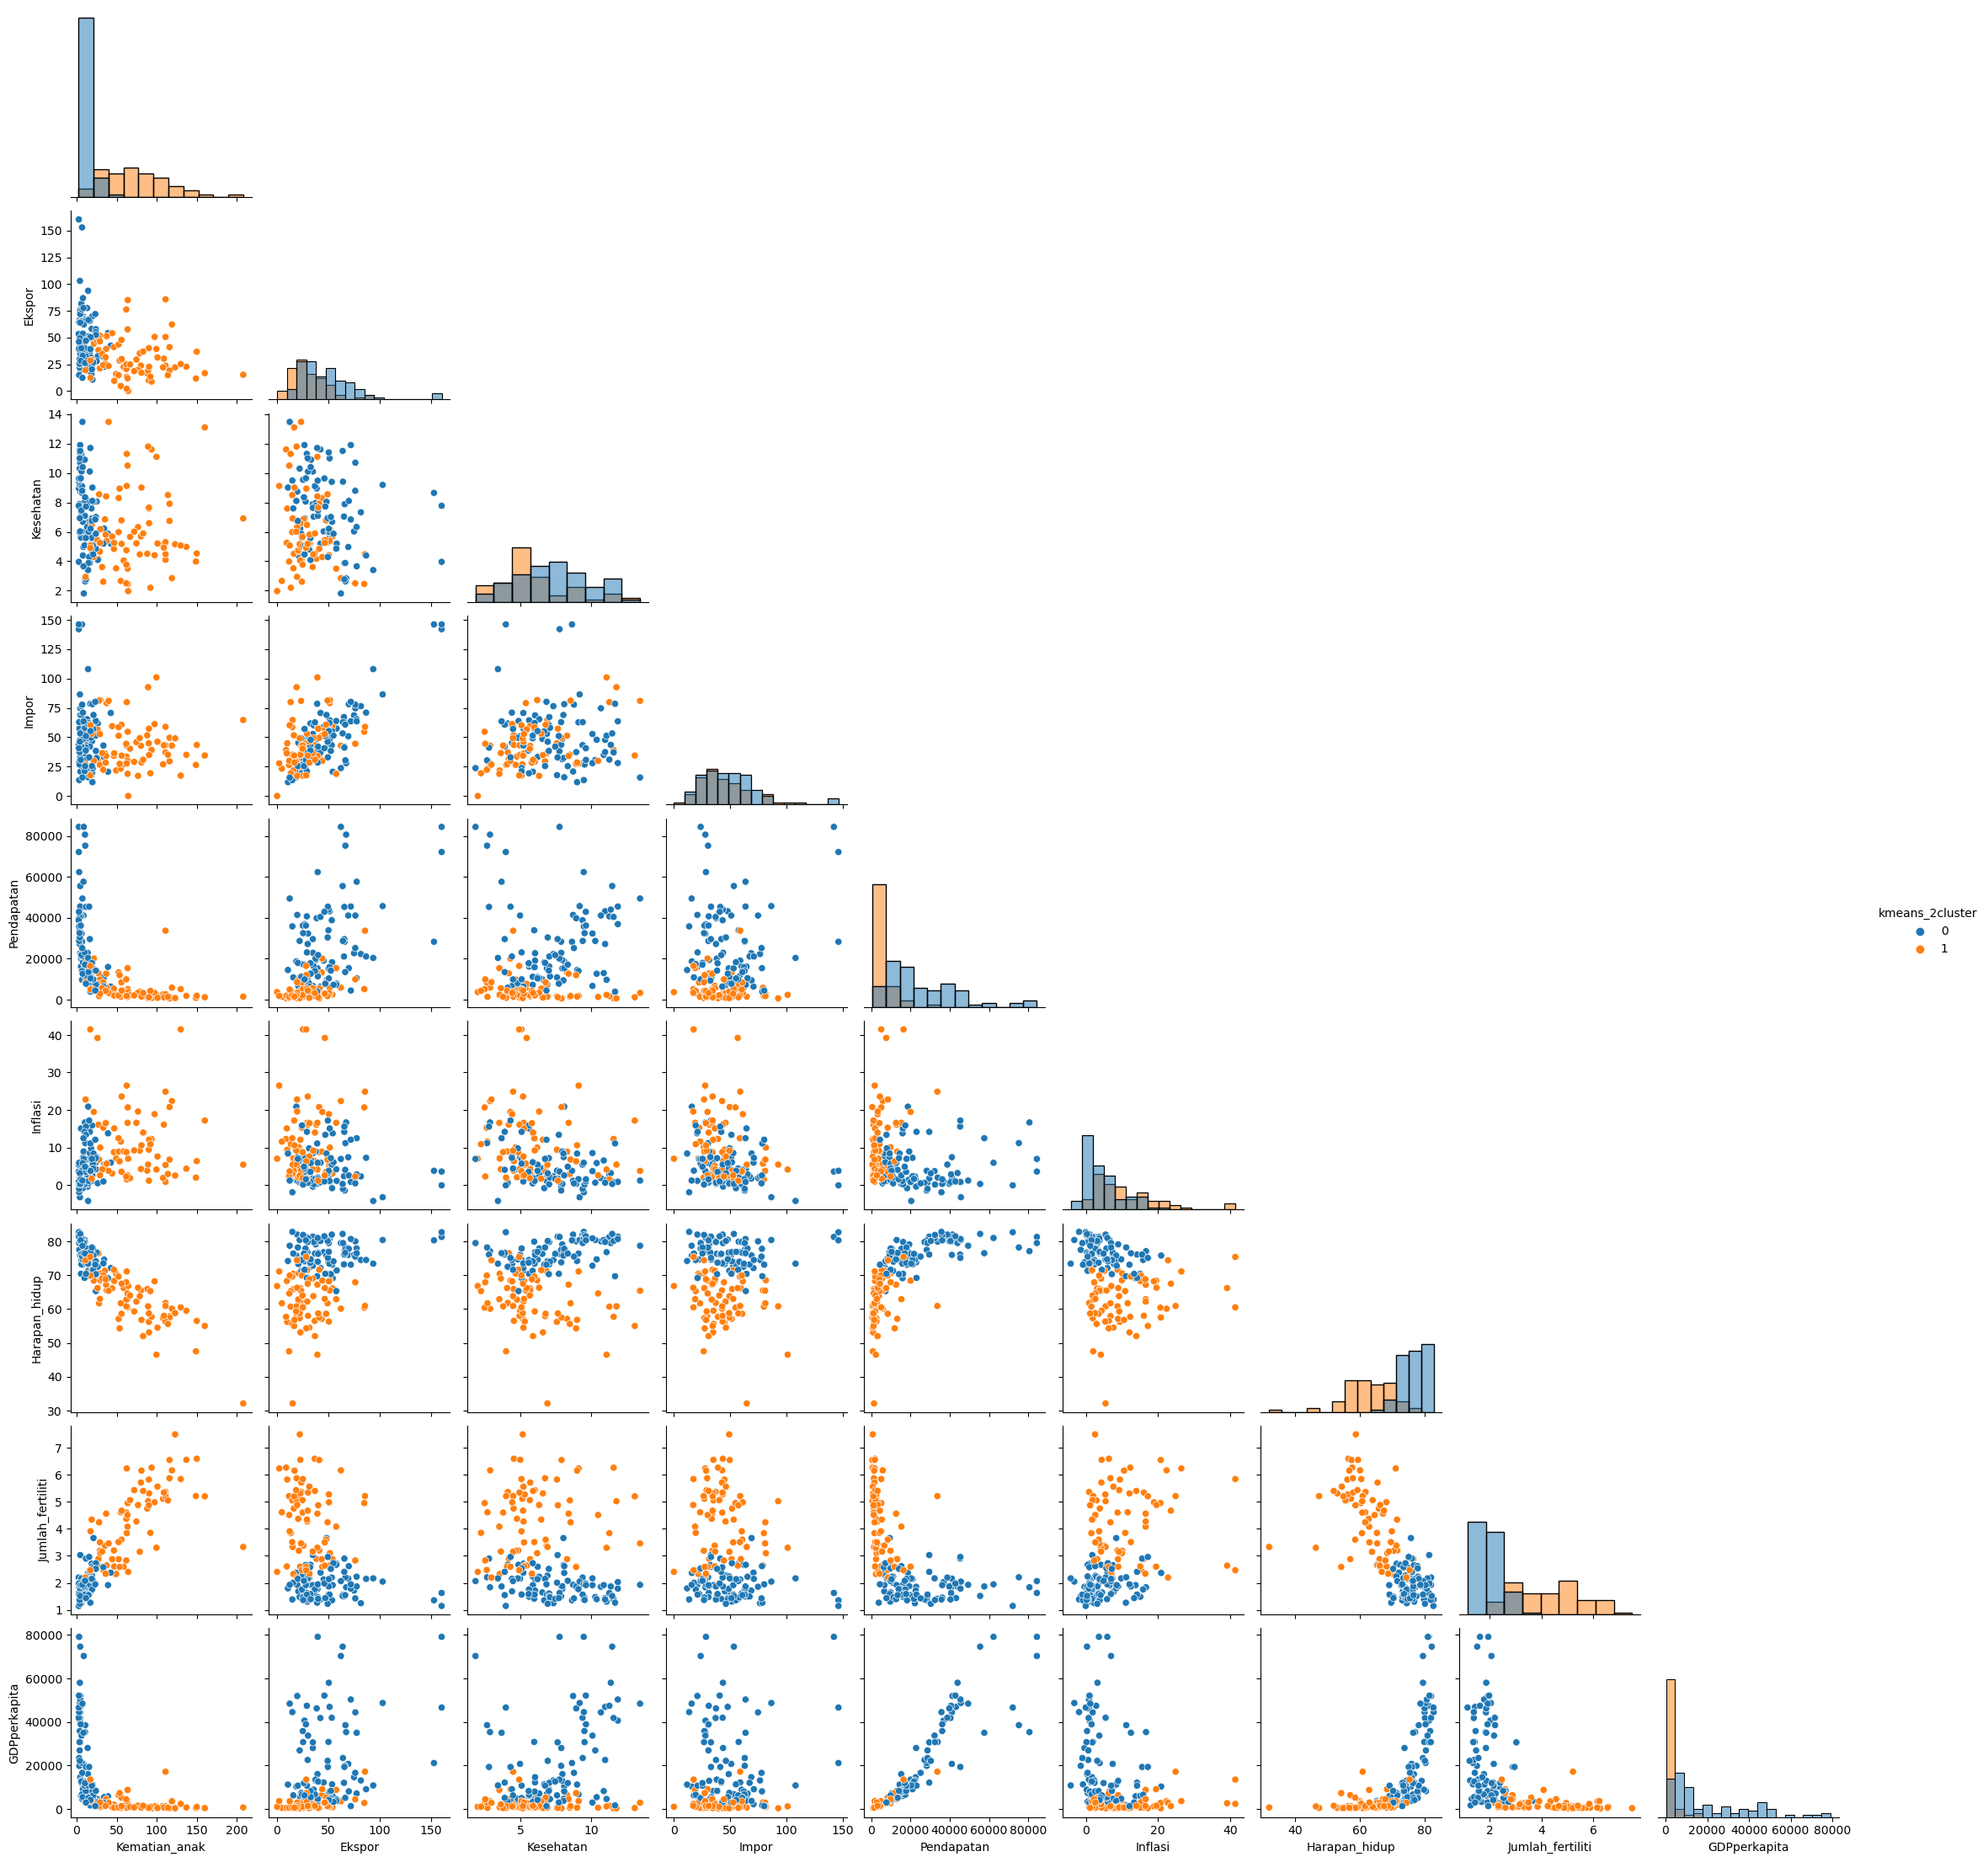

In [31]:
# Visualize the 2-clusters
plt.figure(figsize=(16,20))
g = sns.pairplot(_tempdf, hue="kmeans_2cluster", diag_kind="hist", corner=True)
plt.show()

2-Clustering bukanlah pilihan yang baik dan hanya menghasilkan sedikit cluster. Oleh karena itu, kita dapat menggunakan metode siku atau metode skor siluet untuk menemukan opsi klaster lain yang lebih akurat.

**Create functions for Elbow method**

In [32]:
# Elbow Method to find most accurate n-cluster
def elbowMethod(data, k_min=2, k_max= 10):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(data)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, wcss, marker='o')

    for i, value in enumerate(wcss):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.axvline(x = 4, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

**Create functions for silhoutte method**

In [33]:
# silhouette Method to find most accurate n-cluster
def silMethod(data, k_min=2, k_max=10):
    sil_score = []
    k_range = range(k_min, k_max+1)

    for k in k_range:
        model2 = KMeans(n_clusters = k)
        model2.fit(data)
        labels = model2.labels_
        s_score = silhouette_score(data, labels, metric='euclidean')
        sil_score.append(s_score)
        
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, sil_score, marker='o')

    for i, value in enumerate(sil_score):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.xticks(k_range)
    plt.axvline(x = 4, color = 'r')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

Elbow Method



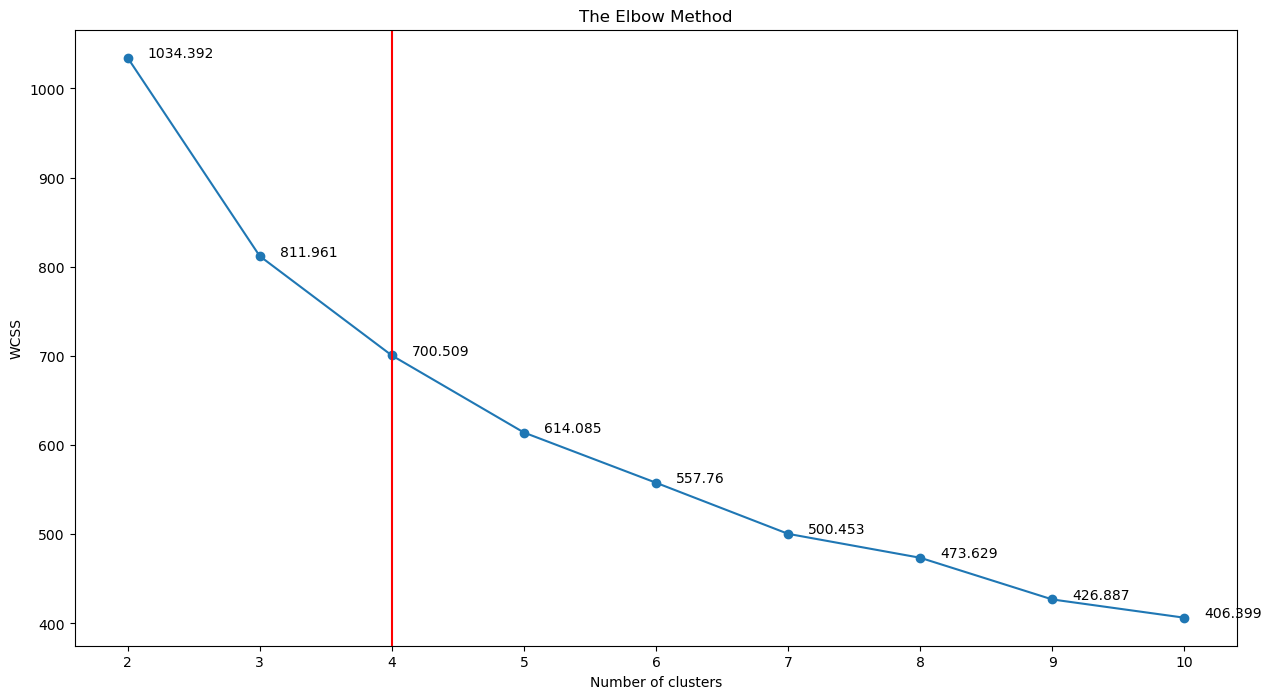

In [34]:
print('Elbow Method')
print()
elbowMethod(scaled_df)

Silhouette Method



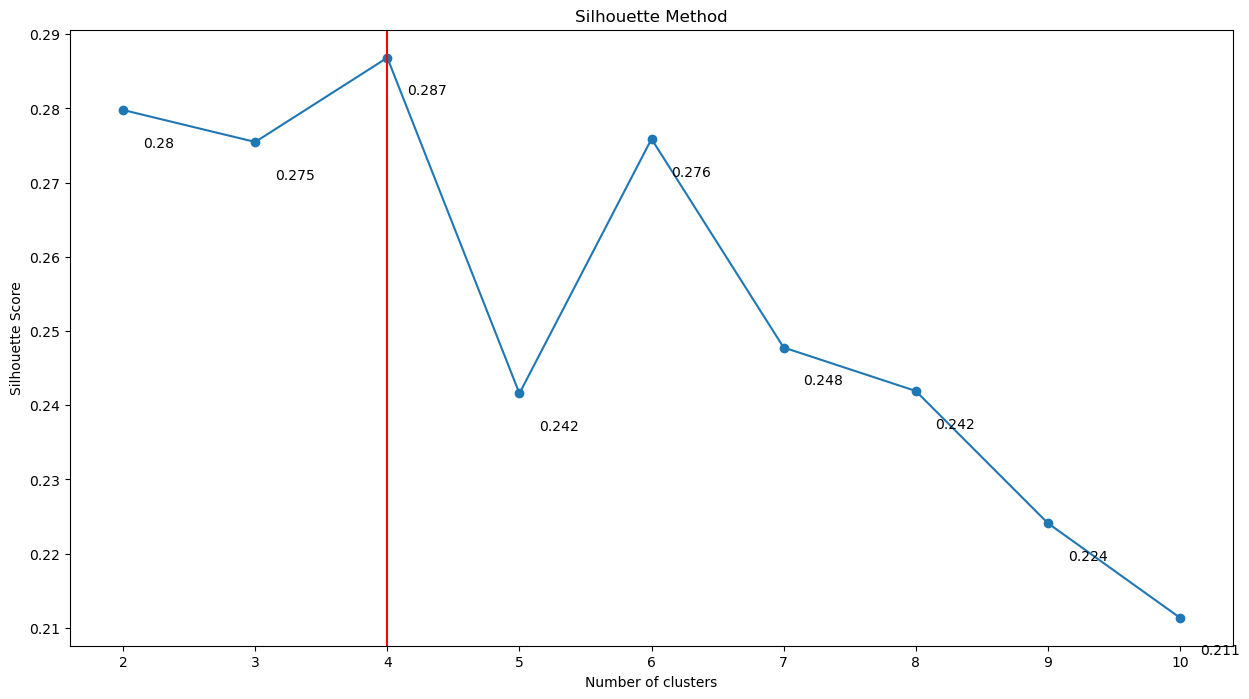

In [35]:
print('Silhouette Method')
print()
silMethod(scaled_df)

Kita bisa melihat dari titik siku dan skor siluet, cluster terbaik yang bisa kita dapatkan adalah 3-cluster atau 4-cluster.Kita bisa memilih 4-cluster karena cenderung memiliki skor siluet yang lebih tinggi.

In [36]:
# Clustering with n_cluster 4
kmeans2 = KMeans(n_clusters = 4, random_state = 42).fit(scaled_df)
labels2 = kmeans2.labels_

In [37]:
# Check after 4-clustering
print('n-cluster = 4')
print()
new_df['Cluster'] = labels2
print('Cluster and its countries quantity :')
display(new_df.Cluster.value_counts(ascending=True))
print()
display(new_df.head())

n-cluster = 4

Cluster and its countries quantity :


Cluster
3     3
0    32
1    48
2    84
Name: count, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2


In [40]:
# Exclude non-numeric columns from mean calculation
numeric_cols = new_df.select_dtypes(include='number').columns
analysis_res = new_df.groupby('Cluster')[numeric_cols].mean()
analysis_res['Banyak_negara'] = new_df.groupby('Cluster')['Negara'].count()
display(analysis_res)


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster,Banyak_negara
Cluster,,,,,,,,,,,
0,5.181250,46.118750,8.950125,40.584375,42752.312500,2.513844,80.081250,1.788437,41846.500000,0.0,32
1,92.366667,28.546229,6.296458,41.443040,3937.770833,10.613396,59.345833,4.953958,1902.916667,1.0,48
2,21.182143,41.561667,6.238738,48.484524,12777.976190,7.563476,72.944048,2.299405,6585.404762,2.0,84
3,4.133333,157.986667,6.793333,144.720000,61591.333333,2.468000,81.433333,1.380000,48929.333333,3.0,3


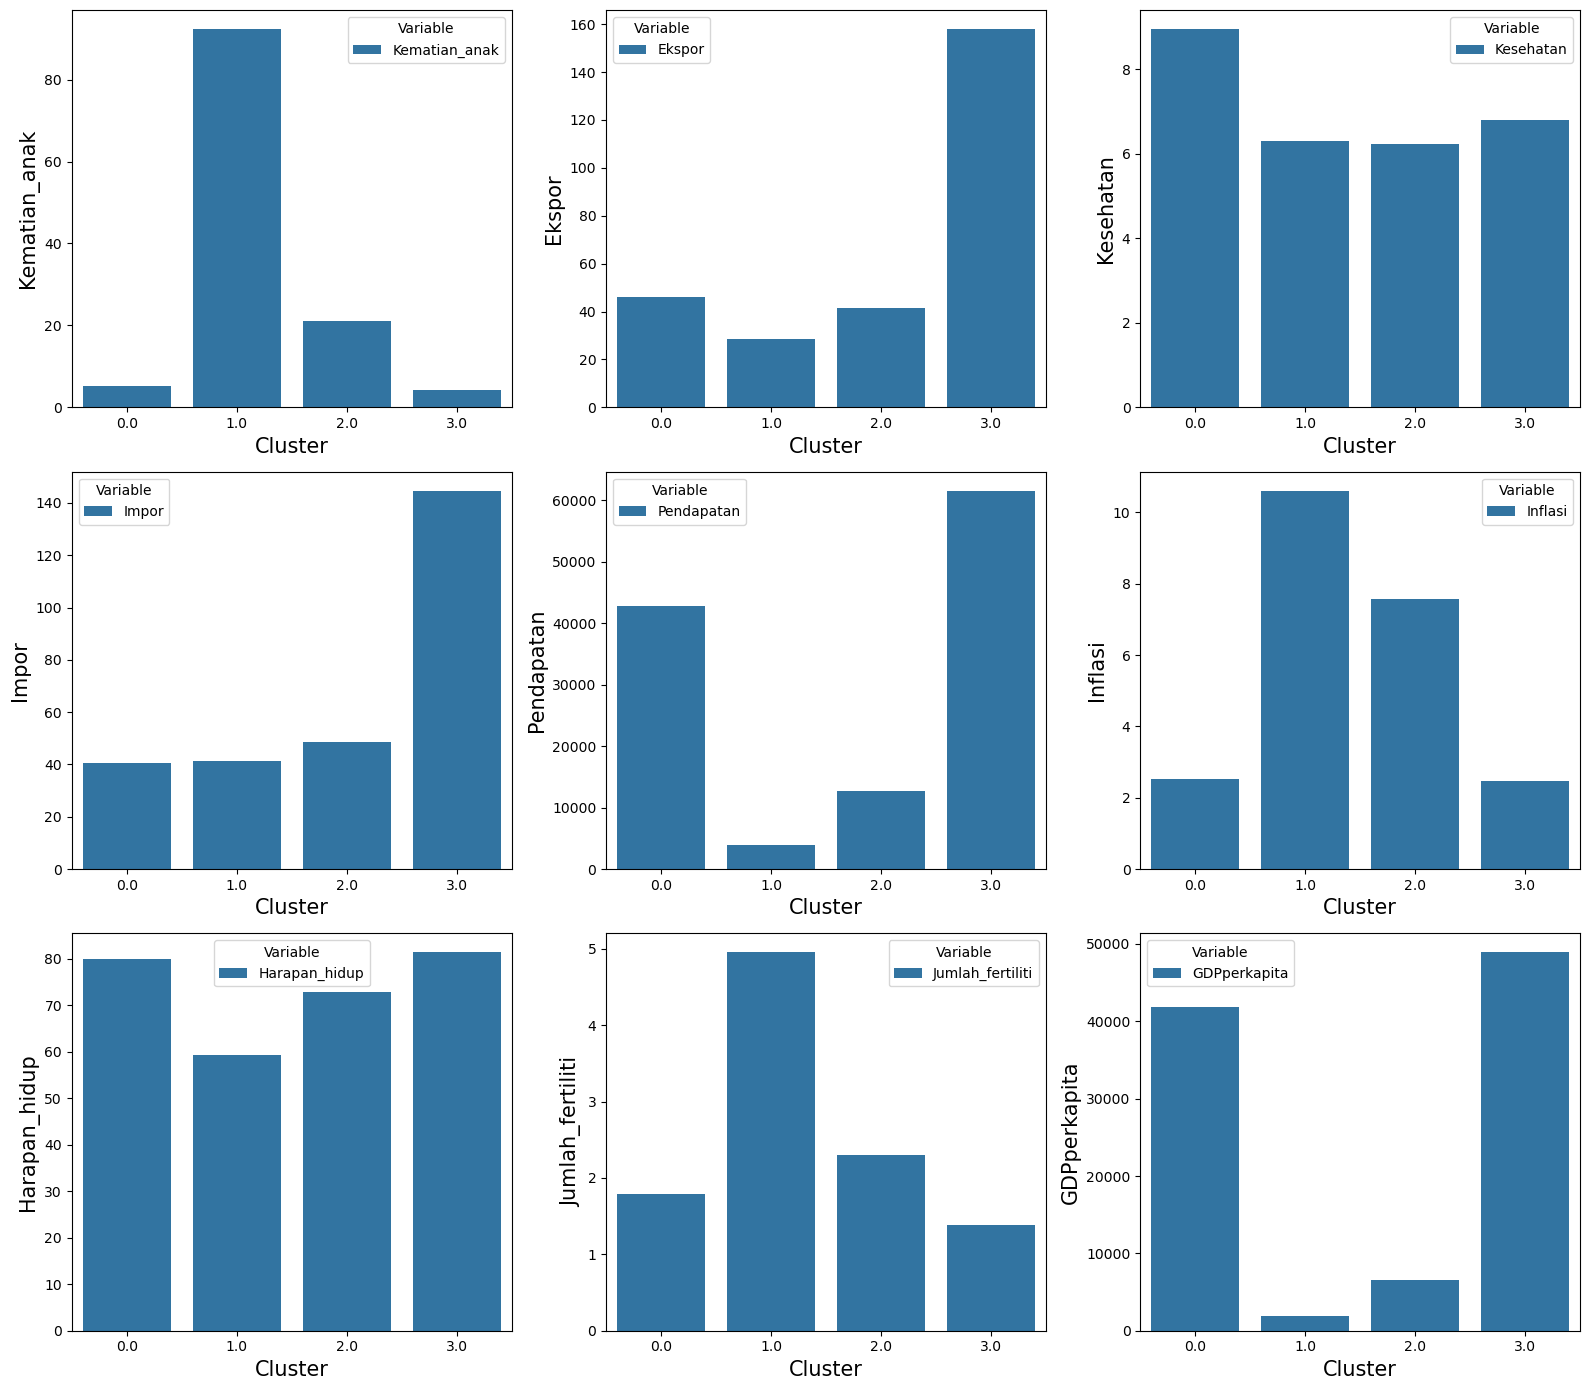

In [43]:
# Assuming analysis_res has columns like 'Cluster', 'mean_Kematian_anak', 'mean_Variable2', etc.
melted_df = pd.melt(analysis_res, id_vars='Cluster', var_name='Variable', value_name='Mean')

plt.figure(figsize=(16, 14))
for i, var in enumerate(num_df.columns):
    plt.subplot(3, 3, i+1)
    sns.barplot(x='Cluster', y='Mean', hue='Variable', data=melted_df[melted_df['Variable'].str.contains(var)])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()


Berdasarkan grafik di atas, kita harus mempertimbangkan negara-negara klaster 2 untuk rekomendasi bantuan karena semua fitur data yang mewakili klaster 2 adalah yang paling dekat dengan karakteristik negara-negara terbelakang yang membutuhkan bantuan keuangan. Berikut adalah alasan mengapa kita harus memilih klaster 2 sebagai pilihan.
* 'Kematian_anak' tertinggi
* 'Ekspor' terendah
* 'Kesehatan' yang relatif rendah
* 'Impor' yang relatif rendah
* 'Pendapatan' terendah
* 'Inflasi' tertinggi
* 'Harapan_hidup' terendah
* 'Jumlah_kelahiran' Tertinggi
* 'PDB per kapita' terendah

# **6. Report Countries** <br/> 

**Recommendation for HELP International**

Karena keterbatasan keuangan yang dimiliki oleh HELP International, maka yang terbaik adalah memilih negara yang paling terbelakang. Oleh karena itu, kami akan memilih setidaknya 5 negara yang paling terbelakang berdasarkan kriteria berikut.

* 'Kematian_anak' tertinggi
* 'Ekspor' terendah
* 'Kesehatan' terendah
* 'Impor' tertinggi
* 'Pendapatan' terendah
* 'Inflasi' tertinggi
* Terendah 'Harapan_hidup'
* Tertinggi 'Jumlah_fertiliti'
* Terendah 'PDBperkapita'

In [47]:
# Show top 5 countries as a recommendation result
results = new_df[new_df['Cluster']==1]
results.sort_values(['GDPperkapita','Pendapatan','Kematian_anak','Kesehatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','Impor','Ekspor'], 
                    ascending=[True,True,False,True,False,True,False,False,True]).head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,1
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,1
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,7.49,348.0,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,1
